# A MODEL FOR OPTIMIZING DIAGNOSIS AND CLASSIFICATION OF GLAUCOMA USING DEEP LEARNING TECHNIQUES (CNN)

    *************************************************************
    Author:  Adeyemi Adedoyin Simeon
    Program: MSc, Computer Science, University of Ibadan
    Course:  AI: Machine Learning
    Date:    25th May, 2019
    Version: 1.3
    E-mail:  adeyemi.sa1@gmail.com
    *************************************************************
    
    *Note: Please reference the author whenever and wherever you use all/portion of this code*

In [ ]:
# importing libraries and packages

In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

import os, shutil
from os import listdir, path

# CNN keras libs
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

# Visualizing Model Architecture
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import pydot

# loading saved cnn model
from keras.models import load_model
from keras.preprocessing import image

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, roc_auc_score

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Connecting Google Colab to Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Setting Dataset Home Path on google drive

# NOTE:
# Change these two paths to point to where you saved the Dataset on your google drive
# Click the link that pops-up to authenticate with your google account to allow colab access your drive
# Copy the access code generated and past in the space provided in your google colab and press enter.
# Everything in the codes should now run fine
# I have shared the Dataset folder on my google drive with you.

origin_path = "/content/gdrive/My Drive/Datasets/GlaucomaDataset/datasets"
model_path = "/content/gdrive/My Drive/Datasets/GlaucomaDataset/models"

# Moving Files from original folder to approriate ones

## Creating Training Set

In [ ]:
try:

  # --------------------------------------------------------------------------
  # Create folder for normal birds and copy files
  # MOVING NORMAL BIRDS
  for file in listdir(path.join(origin_path, 'dataset/train_set/normal')):
    src_path = origin_path + 'dataset/train/normal/' + file
    dest_path = path.join(origin_path, 'dataset2/train/healthy/' + file.replace(' ', ''))
    #Copy files
    if path.exists(dest_path) == False:
      shutil.copy(src_path, dest_path)

  for file in listdir(path.join(origin_path, 'dataset/validation/normal')):
    src_path = origin_path + 'dataset/validation/normal/' + file
    dest_path = path.join(origin_path, 'dataset2/validation/healthy/' + file.replace(' ', ''))
    #Copy files
    if path.exists(dest_path) == False:
      shutil.copy(src_path, dest_path)

  for file in listdir(path.join(origin_path, 'dataset/test/normal')):
    src_path = origin_path + 'dataset/test/normal/' + file
    dest_path = path.join(origin_path, 'dataset2/test/healthy/' + file.replace(' ', ''))
    #Copy files
    if path.exists(dest_path) == False:
      shutil.copy(src_path, dest_path)


  # --------------------------------------------------------------------------
  # Create folder for Avian-Flu birds and copy files
  # AVIAN-FLU
  for file in listdir(path.join(origin_path, 'dataset/train/avian_flu')):
    src_path = origin_path + 'dataset/train/avian_flu/' + file
    dest_path = path.join(origin_path, 'dataset2/train/sick/' + file.replace(' ', ''))
    #Copy files
    if path.exists(dest_path) == False:
      shutil.copy(src_path, dest_path)

  for file in listdir(path.join(origin_path, 'dataset/validation/avian_flu')):
    src_path = origin_path + 'dataset/validation/avian_flu/' + file
    dest_path = path.join(origin_path, 'dataset2/validation/sick/' + file.replace(' ', ''))
    #Copy files
    if path.exists(dest_path) == False:
      shutil.copy(src_path, dest_path)

  for file in listdir(path.join(origin_path, 'dataset/test/avian_flu')):
    src_path = origin_path + 'dataset/test/avian_flu/' + file
    dest_path = path.join(origin_path, 'dataset2/test/sick/' + file.replace(' ', ''))
    #Copy files
    if path.exists(dest_path) == False:
      shutil.copy(src_path, dest_path)


  # --------------------------------------------------------------------------
  # Create folder for NewCastle birds and copy files
  # NEWCASTLE BIRDS
  for file in listdir(path.join(origin_path, 'dataset/train/newcastle')):
    src_path = origin_path + 'dataset/train/newcastle/' + file
    dest_path = path.join(origin_path, 'dataset2/train/sick/' + file.replace(' ', ''))
    #Copy files
    if path.exists(dest_path) == False:
      shutil.copy(src_path, dest_path)

  for file in listdir(path.join(origin_path, 'dataset/validation/newcastle')):
    src_path = origin_path + 'dataset/validation/newcastle/' + file
    dest_path = path.join(origin_path, 'dataset2/validation/sick/' + file.replace(' ', ''))
    #Copy files
    if path.exists(dest_path) == False:
      shutil.copy(src_path, dest_path)

  for file in listdir(path.join(origin_path, 'dataset/test/newcastle')):
    src_path = origin_path + 'dataset/test/newcastle/' + file
    dest_path = path.join(origin_path, 'dataset2/test/sick/' + file.replace(' ', ''))
    #Copy files
    if path.exists(dest_path) == False:
      shutil.copy(src_path, dest_path)


except OSError:
  print('Something went wrong: ', OSError.strerror)

#x = plt.imread("/content/gdrive/My Drive/Datasets/Avian-Flu-NewCastle/newcastle pics/0000-main.jpg")
#plt.imshow(x)

## Viewing Filenames and Labels

In [ ]:
def view_files_and_labels(folder="train_set"):
  # Initialize
  imageNames = list()
  labels = list()

  # Paths
  normal_path = path.join(origin_path, folder + '/normal/')
  open_angle_path = path.join(origin_path, folder + '/open_angle_glaucoma/')
  closed_angle_path = path.join(origin_path, folder + '/closed_angle_glaucoma/')

  # Get data and label
  for file in listdir(normal_path):
    imageNames.append(file)
    labels.append('normal')

  for file in listdir(open_angle_path):
    imageNames.append(file)
    labels.append('open_angle_glaucoma')

  for file in listdir(closed_angle_path):
    imageNames.append(file)
    labels.append('closed_angle_glaucoma')

  # Creating a dictionary of dataset
  dico = {'filename':imageNames, 'label':labels}

  # Converting dico to df
  df = pd.DataFrame(data=dico)

  return df

In [ ]:
# Training, validation and test Sets summary
df_train = view_files_and_labels(folder="train_set")
df_valid = view_files_and_labels(folder="validation_set")
df_test = view_files_and_labels(folder="test_set")

In [ ]:
print("Training Set")
print("------------")
print(f"{df_train.label.value_counts()} \n")

print("Validation Set")
print("--------------")
print(f"{df_valid.label.value_counts()} \n")

print("Testing Set")
print("------------")
print(f"{df_test.label.value_counts()}")

Training Set
------------
closed_angle_glaucoma    700
open_angle_glaucoma      700
normal                   700
Name: label, dtype: int64 

Validation Set
--------------
closed_angle_glaucoma    200
open_angle_glaucoma      200
normal                   200
Name: label, dtype: int64 

Testing Set
------------
open_angle_glaucoma      100
closed_angle_glaucoma    100
normal                   100
Name: label, dtype: int64


In [ ]:
df_train.head(2)

filename   label
0  1ffa94c5-8d87-11e8-9daf-6045cb817f5b..JPG  normal
1  1ffa94bd-8d87-11e8-9daf-6045cb817f5b..JPG  normal

In [ ]:
df_valid.tail(2)

filename                  label
598  Copy of Copy of 1ffa95fc-8d87-11e8-9daf-6045cb...  closed_angle_glaucoma
599  Copy of Copy of Copy of Copy of 1ffa95f2-8d87-...  closed_angle_glaucoma

In [ ]:
df_test.tail(2)

filename                  label
298  Copy of Copy of Copy of 1ffa9612-8d87-11e8-9da...  closed_angle_glaucoma
299  Copy of Copy of Copy of 1ffa9612-8d87-11e8-9da...  closed_angle_glaucoma

# ==================================================
# CNN CODES BEGINS FROM HERE
# ==================================================

In [ ]:
# del cnn_model1
# del cnn_model2

## Model Configuration 1

In [ ]:
# Initializing the CNN
cnn_model1 = Sequential()

# Adding the Convolution Layers
cnn_model1.add(Conv2D(filters=64, kernel_size=(5,5),
                          input_shape=(256,256,3), activation='relu'))
cnn_model1.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
# Adding the Maxpooling Layer
cnn_model1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Adding Convolution Layers
cnn_model1.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu'))
cnn_model1.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu'))
# Adding Maxpooling Layer
cnn_model1.add(MaxPool2D(pool_size=(2,2)))

# Adding Convolution Layers
cnn_model1.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
cnn_model1.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
# Adding Maxpooling Layer
cnn_model1.add(MaxPool2D(pool_size=(2,2)))

# # Adding Convolution Layers
# cnn_model1.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
# cnn_model1.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
# # Adding Maxpooling Layer
# cnn_model1.add(MaxPool2D(pool_size=(2,2)))

# Step 3: Adding the Flatten Layer and then to Fully_connected ANN
cnn_model1.add(Flatten())
cnn_model1.add(Dense(units=512, activation='relu'))
#cnn_model1.add(Dense(units=256, activation='relu'))
cnn_model1.add(Dense(units=128, activation='relu'))
#cnn_model1.add(Dense(units=64, activation='relu'))
cnn_model1.add(Dense(units=32, activation='relu'))
#cnn_model1.add(Dense(units=16, activation='relu'))

cnn_model1.add(Dense(units=3, activation='softmax')) # output layer

# Compiling the model
cnn_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Alternative Configuration for Multi-lable case
# cnn_model1.add(Dense(units=2, activation='sigmoid')) # output layer
# cnn_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Model Configuration 2

In [ ]:
# Architecture [D132 + RELU D232]
cnn_model2 = Sequential()

# Convolution Layers
cnn_model2.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same',
                 activation ='relu', input_shape = (256,256,3)))
cnn_model2.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same',
                 activation ='relu'))
# Maxpooling Layer
cnn_model2.add(MaxPool2D(pool_size=(2,2)))
#cnn_model2.add(Dropout(0.25)) # Randomly drops a proportion of d ntwk, to improve generalizatn n reduce over-fitting n computatn


# Convolution Layers
cnn_model2.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
cnn_model2.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
# Maxpooling and Dropout Layers
cnn_model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn_model2.add(Dropout(0.25))


# Convolution Layers
cnn_model2.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
cnn_model2.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
# Maxpooling Layer
cnn_model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#cnn_model2.add(Dropout(0.25))


# # Convolution Layers
# cnn_model2.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',
#                  activation ='relu'))
# cnn_model2.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',
#                  activation ='relu'))
# # Maxpooling Layer
# cnn_model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# cnn_model2.add(Dropout(0.25))



cnn_model2.add(Flatten()) # Converts nodes into a single 1-D array, to allow fully-connected ANN
cnn_model2.add(Dense(512, activation = "relu")) # 'relu' = max(0, x), to introduce non-linearity
#cnn_model2.add(Dense(256, activation = "relu")) # 'relu' = max(0, x), to introduce non-linearity
#cnn_model2.add(Dropout(0.25))

cnn_model2.add(Dense(128, activation = "relu")) # 'relu' = max(0, x), to introduce non-linearity
#cnn_model2.add(Dense(64, activation = "relu")) # 'relu' = max(0, x), to introduce non-linearity
cnn_model2.add(Dropout(0.25))

cnn_model2.add(Dense(32, activation = "relu")) # 'relu' = max(0, x), to introduce non-linearity
#cnn_model2.add(Dense(16, activation = "relu")) # 'relu' = max(0, x), to introduce non-linearity
#cnn_model2.add(Dropout(0.25))


cnn_model2.add(Dense(3, activation = "softmax")) # 'softmax' a multiclass activation fn, uses prob distr of outputs.
                                            # usually used at the output layer of non-binary classification problems

# Configuring optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0) # Root Mean Squared Optimizer with default values
# Note:
      # * Could have used Stochastic Gradient Descent ('sgd') optimizer instead but it is slow, and RMSprop is simple and faster
      # * 'adam' is another optimizer. An improvement of 'sgd' optimizer

# Compile the cnn_model2
cnn_model2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Alternative Configuration for Multi-lable case
# cnn_model1\2.add(Dense(units=3, activation='sigmoid')) # output layer
# cnn_model2.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])


# Model Configuration 3

In [ ]:

# Initializing the CNN
cnn_model3 = Sequential()

# Adding the Convolution Layers
cnn_model3.add(Conv2D(filters=64, kernel_size=(5,5),
                          input_shape=(128,128,3), activation='relu'))
cnn_model3.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
# Adding the Maxpooling Layer
cnn_model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Adding Convolution Layers
cnn_model3.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu'))
cnn_model3.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu'))
# Adding Maxpooling Layer
cnn_model3.add(MaxPool2D(pool_size=(2,2)))

# Adding Convolution Layers
cnn_model3.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
cnn_model3.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
# Adding Maxpooling Layer
cnn_model3.add(MaxPool2D(pool_size=(2,2)))

# # Adding Convolution Layers
# cnn_model1.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
# cnn_model1.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
# # Adding Maxpooling Layer
# cnn_model1.add(MaxPool2D(pool_size=(2,2)))

# Step 3: Adding the Flatten Layer and then to Fully_connected ANN
cnn_model3.add(Flatten())
cnn_model3.add(Dense(units=512, activation='relu'))
#cnn_model3.add(Dense(units=256, activation='relu'))
cnn_model3.add(Dense(units=128, activation='relu'))
#cnn_model3.add(Dense(units=64, activation='relu'))
cnn_model3.add(Dense(units=32, activation='relu'))
#cnn_model3.add(Dense(units=16, activation='relu'))

cnn_model3.add(Dense(units=3, activation='softmax')) # output layer

# Compiling the model
cnn_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Alternative Configuration for Multi-lable case
# cnn_model3.add(Dense(units=2, activation='sigmoid')) # output layer
# cnn_model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Configuration 4

In [ ]:
del cnn_model4

In [ ]:
# Initializing the CNN
cnn_model4 = Sequential()

# Adding the Convolution Layers
cnn_model4.add(Conv2D(filters=64, kernel_size=(5,5),
                          input_shape=(64,64,3), activation='relu'))
cnn_model4.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
# Adding the Maxpooling Layer
cnn_model4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Adding Convolution Layers
cnn_model4.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu'))
cnn_model4.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu'))
# Adding Maxpooling Layer
cnn_model4.add(MaxPool2D(pool_size=(2,2)))

# Adding Convolution Layers
cnn_model4.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
cnn_model4.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
# Adding Maxpooling Layer
cnn_model4.add(MaxPool2D(pool_size=(2,2)))

# # Adding Convolution Layers
# cnn_model4.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
# cnn_model4.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
# # Adding Maxpooling Layer
# cnn_model4.add(MaxPool2D(pool_size=(2,2)))

# Step 3: Adding the Flatten Layer and then to Fully_connected ANN
cnn_model4.add(Flatten())
cnn_model4.add(Dense(units=512, activation='relu'))
#cnn_model4.add(Dense(units=256, activation='relu'))
cnn_model4.add(Dense(units=128, activation='relu'))
#cnn_model4.add(Dense(units=64, activation='relu'))
cnn_model4.add(Dense(units=32, activation='relu'))
#cnn_model4.add(Dense(units=16, activation='relu'))

cnn_model4.add(Dense(units=3, activation='softmax')) # output layer

# Compiling the model
cnn_model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Alternative Configuration for Multi-lable case
# cnn_model4.add(Dense(units=2, activation='sigmoid')) # output layer
# cnn_model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Architectures

## Architecture for Model1 with Configuration 1 (adam optim @256x256x3 Input)

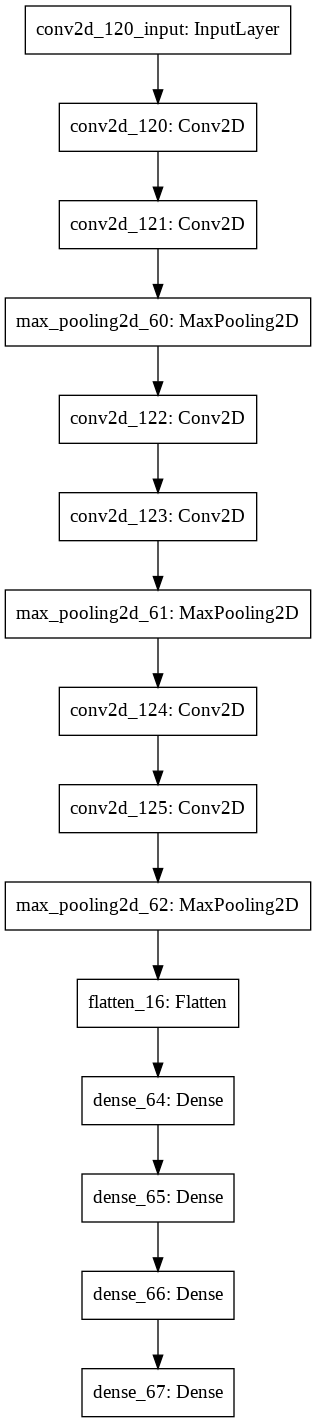

In [ ]:
# Visualizing the Architecture: Method 1
# SVG(data=model_to_dot(cnn_model1).create(prog='dot', format='svg'))

# Visualizing and Saving architecture to file using pydot: Method 2 (Better)
plot_model(model=cnn_model1, to_file=model_path + '/glaucoma_model_config1_adam_Architecture_1st.png')

In [ ]:
# Summary
cnn_model1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 252, 252, 64)      4864      
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 248, 248, 64)      102464    
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 120, 120, 128)     204928    
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 116, 116, 128)     409728    
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 58, 58, 128)       0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 56, 56, 256)     

## Architecture for Model2 with Configuration 2 (RMSprop optim @256x256x3 input)

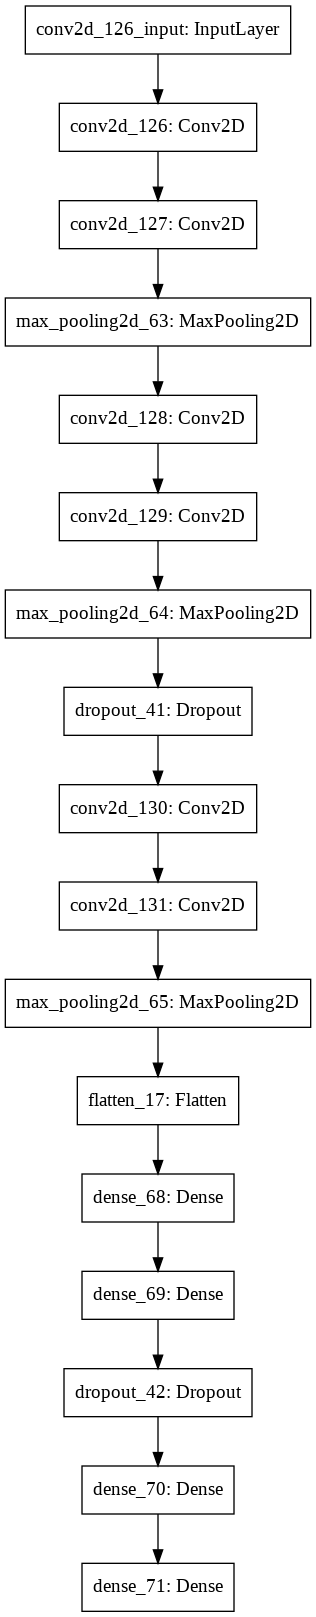

In [ ]:
# Visualizing the Architecture: Method 1
#SVG(data=model_to_dot(cnn_model2).create(prog='dot', format='svg'))

# Saving the above image to file using pydot: Method 2 (Better)
plot_model(model=cnn_model2, to_file=model_path + '/glaucoma_model_config2_RMSprop_Architecture_1st.png')

In [ ]:
# Summary
cnn_model2.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_150 (Conv2D)          (None, 256, 256, 64)      4864      
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 256, 256, 64)      102464    
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 128, 128, 128)     204928    
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 128, 128, 128)     409728    
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 64, 64, 128)     

# Architecture for Model 3 configuration 3 (with Adams @128x128x3 input)

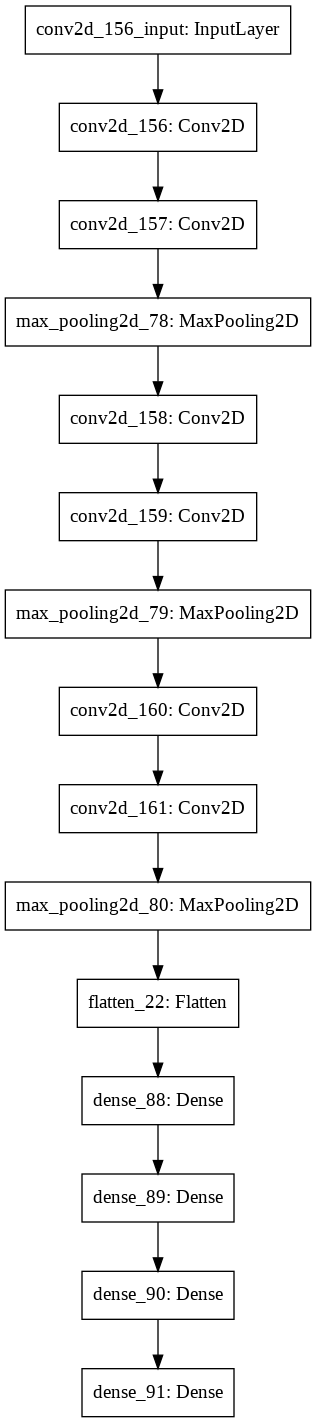

In [ ]:

plot_model(model=cnn_model3, to_file=model_path + '/glaucoma_model_config3_adam_Architecture_1st.png')

In [ ]:
# Summary
cnn_model3.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_156 (Conv2D)          (None, 124, 124, 64)      4864      
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 120, 120, 64)      102464    
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 56, 56, 128)       204928    
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 52, 52, 128)       409728    
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 24, 24, 256)     

# Architecture for Model 4 COnfiguration 4 (Adam @64x64x3 input)

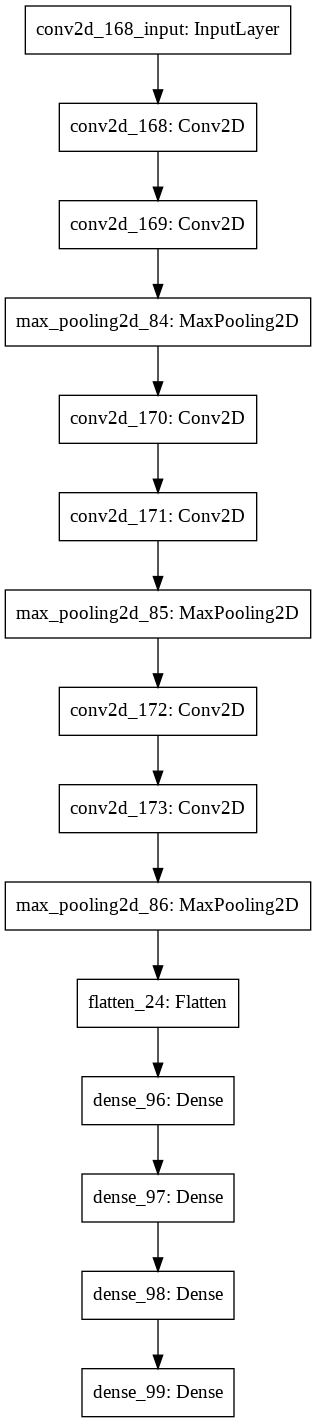

In [ ]:

plot_model(model=cnn_model4, to_file=model_path + '/glaucoma_model_config4_Adam_Architecture_1st.png')

In [ ]:
# Summary

cnn_model4.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_168 (Conv2D)          (None, 60, 60, 64)        4864      
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 56, 56, 64)        102464    
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 20, 20, 128)       409728    
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 8, 8, 256)       

# Image Preprocessing - Augmentation (Generation)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.1,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=False,  # randomly flip images
                                   featurewise_center=False,  # set input mean to 0 over the dataset
                                   samplewise_center=False,  # set each sample mean to 0
                                   featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                   samplewise_std_normalization=False,  # divide each input by its std
                                   zca_whitening=False,  # apply ZCA whitening
                                   rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                   width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                   height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                   )


validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
for file in listdir(origin_path + '/train_set'):
    print(file)

normal
closed_angle_glaucoma
open_angle_glaucoma


In [ ]:
# Generating the training and test data sets
# NOTE: 'target_size' should match the 'input_shape' of the convolution layer

# !rm -r /content/gdrive/"My Drive"/Datasets/GlaucomaDataset/datasets/train_set/.ipynb_checkpoints
# !rm -r /content/gdrive/"My Drive"/Datasets/GlaucomaDataset/datasets/validation_set/.ipynb_checkpoints
# !rm -r /content/gdrive/"My Drive"/Datasets/GlaucomaDataset/datasets/test_set/.ipynb_checkpoints


training_set_aug_images = train_datagen.flow_from_directory(
                                            origin_path + '/train_set',
                                            target_size=(256,256),
                                            batch_size=32,
                                            class_mode='categorical')

validation_set_aug_images = validation_datagen.flow_from_directory(
                                            origin_path + '/validation_set',
                                            target_size=(256,256),
                                            batch_size=32,
                                            class_mode='categorical')

testing_set_aug_images = test_datagen.flow_from_directory(
                                            origin_path + '/test_set',
                                            target_size=(256,256),
                                            batch_size=32,
                                            class_mode='categorical')


Found 2100 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
total_Samples = len(training_set_aug_images.labels) + len(validation_set_aug_images.labels) + len(testing_set_aug_images.labels)
perc_train = np.round((len(training_set_aug_images.labels) / total_Samples) * 100)
perc_valid = np.round((len(validation_set_aug_images.labels) / total_Samples) * 100)
perc_test = np.round((len(testing_set_aug_images.labels) / total_Samples) * 100)

print(f'Total Training Sample: {len(training_set_aug_images.labels)}, \t Percentage: {perc_train}%')
print(f'Total Validation Sample: {len(validation_set_aug_images.labels)}, \t Percentage: {perc_valid}%')
print(f'Total Testing Sample: {len(testing_set_aug_images.labels)}, \t Percentage: {perc_test}%')

Total Training Sample: 2100, 	 Percentage: 70.0%
Total Validation Sample: 600, 	 Percentage: 20.0%
Total Testing Sample: 300, 	 Percentage: 10.0%


# Data Augmentations for Model 3 and Model 4

In [ ]:
training_set_aug_images_conf3 = train_datagen.flow_from_directory(
                                            origin_path + '/train_set',
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode='categorical')

validation_set_aug_images_conf3 = validation_datagen.flow_from_directory(
                                            origin_path + '/validation_set',
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode='categorical')

testing_set_aug_images_conf3 = test_datagen.flow_from_directory(
                                            origin_path + '/test_set',
                                            target_size=(128,128),
                                            batch_size=32,
                                            class_mode='categorical')

Found 2100 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
training_set_aug_images_conf4 = train_datagen.flow_from_directory(
                                            origin_path + '/train_set',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='categorical')

validation_set_aug_images_conf4 = validation_datagen.flow_from_directory(
                                            origin_path + '/validation_set',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='categorical')

testing_set_aug_images_conf4 = test_datagen.flow_from_directory(
                                            origin_path + '/test_set',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='categorical')

Found 2100 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


# Training the Models

## Note:
* I used a small size of epochs (5) because i used a CPU and this actually took up to 6 hours
* For improved predictive accuracy, the number of epochs should be set to around (100 to 150) so the model can learn more
* Use a GPU System</b> <br />


<b>ReduceLROnPlateau():</b> <br />
In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function.

To keep the advantage of the fast computation time with a high LR, i decreased the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).

With the ReduceLROnPlateau function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs. <br /> <br />

<b>EarlyStopping():</b> <br />
In order to reduce (optimize) computational resources, i used an early-stopping mechanism to stop the learning if the validation-loss is not reduced after 5 rounds, at which point it can be assumed the model is no more learning. This can also help prevent over-fitting.

In [ ]:
# NOTE: We only use 5 epochs during the training because of our limited CPU performance limitation. We are confident
# that the model will perform more excellently with more epochs on a GPU.

# Also, due to the same device constraint, we could only train the model on a subset of the dataset. We hope to
# improve the model later when we gain access to online GPU-based Cloud Computing facility.

N_EPOCHS = 15
BATCH_SIZE = 32

In [ ]:
# Note: if error, replace 'val_accuracy' with 'val_acc'
# Seting a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Setting an Early Stopper in case model "loss" does not change over many epochs
early_stopper = EarlyStopping(monitor='loss', min_delta=0,
                             patience=3, verbose=1, mode='auto')

In [ ]:
#x=training_set_aug_images.shuffle(1000).repeat()

In [ ]:
# Fitting The cnn model 1 with the training set
history = cnn_model1.fit_generator(generator=training_set_aug_images,
                                       epochs=N_EPOCHS,
                                       steps_per_epoch=int(0.75 * len(training_set_aug_images.labels) / BATCH_SIZE),
                                       #steps_per_epoch=100,
                                       validation_data=validation_set_aug_images,
                                       validation_steps=int(0.15 * len(validation_set_aug_images.labels) / BATCH_SIZE),
                                       #callbacks=[learning_rate_reduction, early_stopper],
                                       #callbacks=[learning_rate_reduction]
                                       )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
49/49 [==============================] - 158s 3s/step - loss: 1.3399 - accuracy: 0.3975 - val_loss: 1.0180 - val_accuracy: 0.6562
Epoch 2/15
49/49 [==============================] - 152s 3s/step - loss: 0.6860 - accuracy: 0.6670 - val_loss: 0.8407 - val_accuracy: 0.6875
Epoch 3/15
49/49 [==============================] - 154s 3s/step - loss: 0.3454 - accuracy: 0.8600 - val_loss: 0.8295 - val_accuracy: 0.7500
Epoch 4/15
49/49 [==============================] - 153s 3s/step - loss: 0.4860 - accuracy: 0.8046 - val_loss: 0.7226 - val_accuracy: 0.6250
Epoch 6/15
49/49 [==============================] - 154s 3s/step - loss: 0.3706 - accuracy: 0.8078 - val_loss: 1.2788 - val_accuracy: 0.6562
Epoch 7/15
49/49 [==============================] - 155s 3s/step - loss: 0.2611 - accuracy: 0.9030 - val_loss: 2.3971 - val_accuracy: 0.6406
Epoch 8/15
49/49 [==============================] - 156s 3s/step - loss: 0.1913 - accuracy: 0.9468 - val_loss: 1.6451 - val_accuracy: 0.6250
Epoch 9/15
49

In [ ]:
# cnn_model2 with Configuration 2
history2 = cnn_model2.fit_generator(generator=training_set_aug_images,
                               epochs=N_EPOCHS,
                               steps_per_epoch=int(0.75 * len(training_set_aug_images.labels) / BATCH_SIZE),
                               #steps_per_epoch=100,
                               validation_data=validation_set_aug_images,
                               validation_steps=int(0.15 * len(validation_set_aug_images.labels) / BATCH_SIZE),
                               callbacks=[learning_rate_reduction]
                               )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
49/49 [==============================] - 163s 3s/step - loss: 14.8096 - accuracy: 0.3354 - val_loss: 1.1021 - val_accuracy: 0.2500
Epoch 2/15
49/49 [==============================] - 160s 3s/step - loss: 1.2867 - accuracy: 0.3669 - val_loss: 1.0995 - val_accuracy: 0.3125
Epoch 3/15
49/49 [==============================] - 158s 3s/step - loss: 1.1549 - accuracy: 0.3614 - val_loss: 1.1161 - val_accuracy: 0.2188
Epoch 4/15
49/49 [==============================] - 158s 3s/step - loss: 1.2713 - accuracy: 0.3131 - val_loss: 1.0968 - val_accuracy: 0.3906
Epoch 5/15
49/49 [==============================] - 158s 3s/step - loss: 1.1204 - accuracy: 0.3254 - val_loss: 0.9879 - val_accuracy: 0.5312

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/15
49/49 [==============================] - 156s 3s/step - loss: 1.3999 - accuracy: 0.6374 - val_loss: 0.7755 - val_accuracy: 0.5938
Epoch 7/15
49/49 [==============================] - 157s 3s/step - loss:

In [ ]:
# Fitting The cnn model with the training set
history3 = cnn_model3.fit_generator(generator=training_set_aug_images_conf3,
                                       epochs=15,
                                       steps_per_epoch=int(0.75 * len(training_set_aug_images_conf3.labels) / BATCH_SIZE),
                                       validation_data=validation_set_aug_images_conf3,
                                       validation_steps=int(0.15 * len(validation_set_aug_images_conf3.labels) / BATCH_SIZE),
                                       )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
49/49 [==============================] - 137s 3s/step - loss: 0.9973 - accuracy: 0.4493 - val_loss: 1.0607 - val_accuracy: 0.4062
Epoch 2/15
49/49 [==============================] - 135s 3s/step - loss: 0.7665 - accuracy: 0.5477 - val_loss: 0.8499 - val_accuracy: 0.6250
Epoch 3/15
49/49 [==============================] - 136s 3s/step - loss: 0.3744 - accuracy: 0.8553 - val_loss: 0.8478 - val_accuracy: 0.7500
Epoch 4/15
49/49 [==============================] - 134s 3s/step - loss: 0.2972 - accuracy: 0.8997 - val_loss: 1.1358 - val_accuracy: 0.6875
Epoch 5/15
49/49 [==============================] - 134s 3s/step - loss: 0.2200 - accuracy: 0.9206 - val_loss: 0.8790 - val_accuracy: 0.7500
Epoch 6/15
49/49 [==============================] - 135s 3s/step - loss: 0.1563 - accuracy: 0.9502 - val_loss: 3.3474 - val_accuracy: 0.6094
Epoch 7/15
49/49 [==============================] - 134s 3s/step - loss: 0.5332 - accuracy: 0.8306 - val_loss: 1.2193 - val_accuracy: 0.6719
Epoch 8/15
49

In [ ]:
# Fitting The cnn model 4 with the training set
history4 = cnn_model4.fit_generator(generator=training_set_aug_images_conf4,
                                       epochs=N_EPOCHS,
                                       steps_per_epoch=int(0.75 * len(training_set_aug_images_conf4.labels) / BATCH_SIZE),
                                       validation_data=validation_set_aug_images_conf4,
                                       validation_steps=int(0.15 * len(validation_set_aug_images_conf4.labels) / BATCH_SIZE),
                                       )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
49/49 [==============================] - 132s 3s/step - loss: 1.0958 - accuracy: 0.3367 - val_loss: 1.0600 - val_accuracy: 0.3906
Epoch 2/15
49/49 [==============================] - 129s 3s/step - loss: 0.8255 - accuracy: 0.6036 - val_loss: 0.9188 - val_accuracy: 0.5156
Epoch 3/15
49/49 [==============================] - 129s 3s/step - loss: 0.5923 - accuracy: 0.7076 - val_loss: 0.9722 - val_accuracy: 0.5156
Epoch 4/15
49/49 [==============================] - 129s 3s/step - loss: 0.4783 - accuracy: 0.8120 - val_loss: 1.1269 - val_accuracy: 0.7031
Epoch 5/15
49/49 [==============================] - 129s 3s/step - loss: 0.3237 - accuracy: 0.8642 - val_loss: 2.2521 - val_accuracy: 0.5938
Epoch 6/15
49/49 [==============================] - 128s 3s/step - loss: 0.3561 - accuracy: 0.8713 - val_loss: 1.0845 - val_accuracy: 0.7656
Epoch 7/15
49/49 [==============================] - 128s 3s/step - loss: 0.2425 - accuracy: 0.9212 - val_loss: 0.9997 - val_accuracy: 0.7188
Epoch 8/15
49

# Evaluating Trained Models

In [ ]:
scores1 = cnn_model1.evaluate_generator(generator=testing_set_aug_images, steps=int(0.75 * len(testing_set_aug_images.labels) / BATCH_SIZE), verbose=2)
scores2 = cnn_model2.evaluate_generator(generator=testing_set_aug_images, steps=int(0.75 * len(testing_set_aug_images.labels) / BATCH_SIZE), verbose=2)

scores3 = cnn_model3.evaluate_generator(generator=testing_set_aug_images_conf3, steps=int(0.75 * len(testing_set_aug_images_conf3.labels) / BATCH_SIZE), verbose=2)
scores4 = cnn_model4.evaluate_generator(generator=testing_set_aug_images_conf4, steps=int(0.75 * len(testing_set_aug_images_conf4.labels) / BATCH_SIZE), verbose=2)

# Displaying Evaluation Result
print("\nSCORES OF EVALUATING TEST SET ON EACH THE MODELS")
print('-------------------------------------------------\n')
print(f"Evaluation of model 1 with Config 1: \t\t (loss = {np.round(scores1[0], 5)} \t accuracy = {np.round(scores1[1] * 100, 1)}%)")
print(f"Evaluation of model 2 with Config 2: \t\t (loss = {np.round(scores2[0], 5)} \t accuracy = {np.round(scores2[1] * 100, 1)}%)")
print(f"Evaluation of model 3 with Config 3: \t\t (loss = {np.round(scores3[0], 5)} \t accuracy = {np.round(scores3[1] * 100, 1)}%)")
print(f"Evaluation of model 4 with Config 4: \t\t (loss = {np.round(scores4[0], 5)} \t accuracy = {np.round(scores4[1] * 100, 1)}%)")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


7/7 - 18s - loss: 1.8338 - accuracy: 0.7411
7/7 - 18s - loss: 0.7906 - accuracy: 0.8482
7/7 - 17s - loss: 1.4625 - accuracy: 0.8661
7/7 - 17s - loss: 0.9085 - accuracy: 0.8259

SCORES OF EVALUATING TEST SET ON EACH THE MODELS
-------------------------------------------------

Evaluation of model 1 with Config 1: 		 (loss = 1.83378 	 accuracy = 74.1%)
Evaluation of model 2 with Config 2: 		 (loss = 0.7906 	 accuracy = 84.8%)
Evaluation of model 3 with Config 3: 		 (loss = 1.46246 	 accuracy = 86.6%)
Evaluation of model 4 with Config 4: 		 (loss = 0.90849 	 accuracy = 82.6%)


# Saving the Trained Model

In [ ]:
cnn_model1.save(model_path + '/model1_glaucoma_config1_adam_256.h5')
cnn_model2.save(model_path + '/model2_glaucoma_config2_RMSprop_256.h5')

cnn_model3.save(model_path + '/model3_glaucoma_config3_Adam_128.h5')
cnn_model4.save(model_path + '/model4_glaucoma_config4_Adam_64.h5')

## Summary of the Training Result

In [ ]:
# Details of the Training
model_config1_training_info = pd.DataFrame(history.history) # cnn_model1
model_config2_training_info = pd.DataFrame(history2.history) # cnn_model2

model_config3_training_info = pd.DataFrame(history3.history) # cnn_model3
model_config4_training_info = pd.DataFrame(history4.history) # cnn_model4

In [ ]:
# model with Configuration 1 (adams optimizer)
print('Model Config 1 Training Summary.\n')
model_config1_training_info

Model Config 1 Training Summary.



loss  accuracy  val_loss  val_accuracy
0   1.040074  0.491003  1.018002      0.656250
1   0.594640  0.740360  0.840749      0.687500
2   0.320089  0.864158  0.829455      0.750000
3   0.177831  0.934949  2.056932      0.656250
4   0.537609  0.750643  0.722613      0.625000
5   0.295783  0.870180  1.278800      0.656250
6   0.240150  0.916454  2.397111      0.640625
7   0.247941  0.924107  1.645088      0.625000
8   0.161679  0.945373  2.272993      0.625000
9   0.132930  0.955656  1.840170      0.640625
10  0.109404  0.968509  2.230587      0.781250
11  0.109344  0.966199  1.967385      0.671875
12  0.152609  0.951157  1.571056      0.781250
13  0.096555  0.967474  2.074430      0.750000
14  0.139273  0.961440  1.939016      0.781250

In [ ]:
# model with Configuration 2 (RMSprop() [Root Mean Squared] optimizer)
print('Model Config 2 Training Summary.\n')
model_config2_training_info

Model Config 2 Training Summary.



loss  accuracy  val_loss  val_accuracy      lr
0   5.140054  0.340617  1.102061      0.250000  0.0010
1   1.677313  0.356684  1.099522      0.312500  0.0010
2   1.235496  0.346401  1.116143      0.218750  0.0010
3   1.353061  0.328406  1.096759      0.390625  0.0010
4   1.149232  0.345758  0.987910      0.531250  0.0010
5   0.941994  0.697943  0.775470      0.593750  0.0005
6   0.637310  0.728149  0.936147      0.578125  0.0005
7   0.509779  0.802057  0.969716      0.625000  0.0005
8   0.431781  0.848329  0.619452      0.765625  0.0005
9   0.385097  0.873087  0.613707      0.703125  0.0005
10  0.314443  0.894602  0.419483      0.812500  0.0005
11  0.370371  0.906812  0.418486      0.828125  0.0005
12  0.311736  0.904337  0.676556      0.843750  0.0005
13  0.267706  0.923522  0.491702      0.843750  0.0005
14  0.227321  0.929949  0.889583      0.812500  0.0005

In [ ]:
# model with Configuration 3 (Adam optimizer @128)
print('Model Config 3 Training Summary.\n')
model_config3_training_info

Model Config 3 Training Summary.



loss  accuracy  val_loss  val_accuracy
0   0.862467  0.551414  1.060748      0.406250
1   0.580683  0.687661  0.849862      0.625000
2   0.392027  0.841902  0.847786      0.750000
3   0.253409  0.907455  1.135837      0.687500
4   0.227946  0.913882  0.878986      0.750000
5   0.183327  0.936375  3.347420      0.609375
6   0.383051  0.868895  1.219306      0.671875
7   0.304467  0.902314  1.251405      0.687500
8   0.147706  0.953444  4.655490      0.625000
9   0.201858  0.930485  2.885041      0.687500
10  0.240002  0.917092  1.246236      0.703125
11  0.111144  0.966199  1.905379      0.765625
12  0.134386  0.957584  1.958852      0.687500
13  0.098556  0.966837  2.343485      0.687500
14  0.071080  0.979592  2.592708      0.781250

In [ ]:
# model with Configuration 4(Adam optimizer @64)
print('Model Config 4 Training Summary.\n')
model_config4_training_info

Model Config 4 Training Summary.



loss  accuracy  val_loss  val_accuracy
0   1.065783  0.348329  1.059961      0.390625
1   0.740872  0.634961  0.918814      0.515625
2   0.543580  0.741003  0.972191      0.515625
3   0.434268  0.844473  1.126859      0.703125
4   0.302611  0.881105  2.252136      0.593750
5   0.344871  0.874679  1.084534      0.765625
6   0.237090  0.920308  0.999733      0.718750
7   0.207343  0.928571  0.822654      0.765625
8   0.176197  0.936375  1.054008      0.750000
9   0.180025  0.940689  1.795694      0.828125
10  0.260454  0.908098  1.202137      0.578125
11  0.132611  0.957908  0.617758      0.828125
12  0.147552  0.949617  1.709499      0.640625
13  0.107948  0.968509  2.111912      0.593750
14  0.132547  0.958869  2.001732      0.609375

In [ ]:
print("FINAL TRAINING RESULT OF THE TWO  MODELS' CONFIGURATIONS")
print('************************************************************\n')
print(f"Model with Configuration 1 (adam Optim. @256 Input shape): \t  after {len(model_config1_training_info)} epochs :\t Validation_Accuracy = {np.round(max(model_config1_training_info['val_accuracy']) * 100, 2)}%")
print(f"Model with Configuration 2 (RMSprop Optim. @256 Input shape): \t  after {len(model_config2_training_info)} epochs :\t Validation_Accuracy = {np.round(max(model_config2_training_info['val_accuracy']) * 100, 2)}%")
print(f"Model with Configuration 3 (adam Optim. @128 Input shape): \t  after {len(model_config3_training_info)} epochs :\t Validation_Accuracy = {np.round(max(model_config3_training_info['val_accuracy']) * 100, 2)}%")
print(f"Model with Configuration 4 (adam Optim. @64 Input shape): \t  after {len(model_config4_training_info)} epochs :\t Validation_Accuracy = {np.round(max(model_config4_training_info['val_accuracy']) * 100, 2)}%")

FINAL TRAINING RESULT OF THE TWO  MODELS' CONFIGURATIONS
************************************************************

Model with Configuration 1 (adam Optim. @256 Input shape): 	  after 15 epochs :	 Validation_Accuracy = 78.12%
Model with Configuration 2 (RMSprop Optim. @256 Input shape): 	  after 15 epochs :	 Validation_Accuracy = 84.38%
Model with Configuration 3 (adam Optim. @128 Input shape): 	  after 15 epochs :	 Validation_Accuracy = 78.12%
Model with Configuration 4 (adam Optim. @64 Input shape): 	  after 15 epochs :	 Validation_Accuracy = 82.81%


# VISUALIZING TRAINING RESULTS

## Model 1 Training

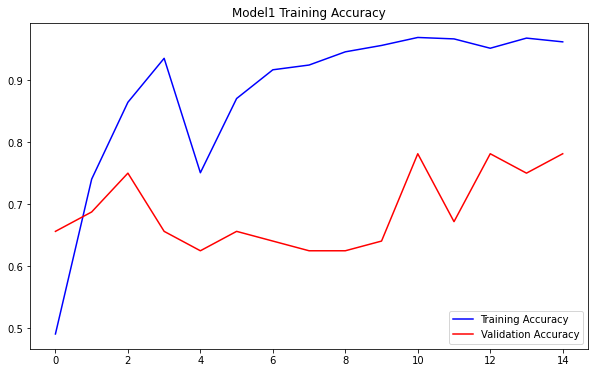

In [ ]:
# Model 1 Training Accuracy

plt.figure(figsize=(10,6))
plt.title("Model1 Training Accuracy")
plt.plot(model_config1_training_info["accuracy"], color='b', label="Training Accuracy")
plt.plot(model_config1_training_info["val_accuracy"], color='r', label="Validation Accuracy")
plt.legend()

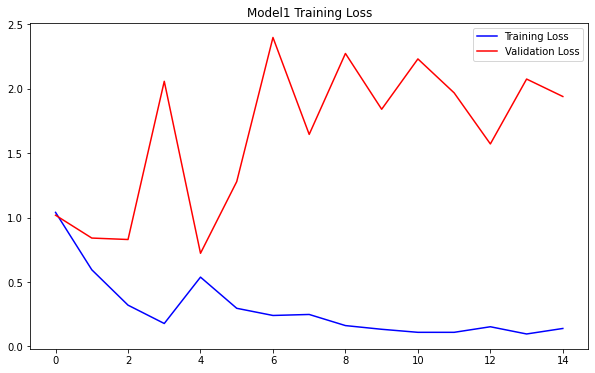

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Model1 Training Loss")
plt.plot(model_config1_training_info["loss"], color='b', label="Training Loss")
plt.plot(model_config1_training_info["val_loss"], color='r', label="Validation Loss")
plt.legend()

Text(0, 0.5, 'Loss')

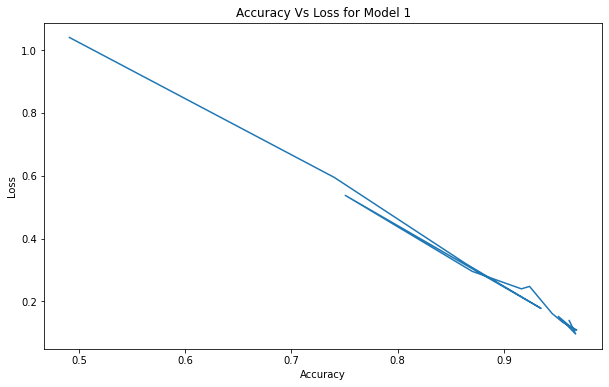

In [ ]:
# Loss Vs Accuracy

x_ticks = np.linspace(np.min(model_config2_training_info.loss) - 0.001,
                      np.max(model_config2_training_info.loss) + 0.001,
                      num=n_epochs)

y_ticks = np.linspace(np.min(model_config2_training_info.accuracy) - 0.001,
                      np.max(model_config2_training_info.accuracy) + 0.001,
                      num=n_epochs)

plt.figure(figsize=(10, 6))
plt.plot(model_config1_training_info.accuracy, model_config1_training_info.loss)
plt.x_ticks = x_ticks
plt.y_ticks = y_ticks
plt.title('Accuracy Vs Loss for Model 1')
plt.xlabel('Accuracy')
plt.ylabel('Loss')

## Model 2 Training

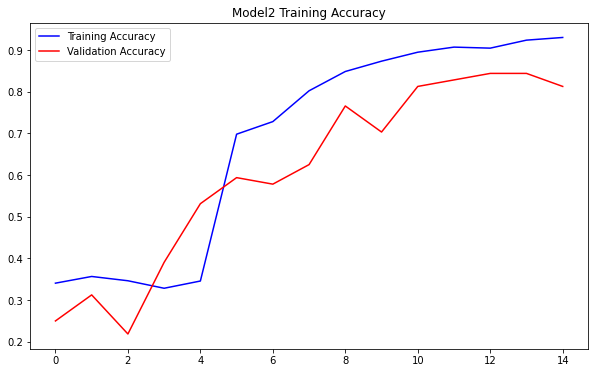

In [ ]:
# Model 2 Training Accuracy

plt.figure(figsize=(10,6))
plt.title("Model2 Training Accuracy")
plt.plot(model_config2_training_info["accuracy"], color='b', label="Training Accuracy")
plt.plot(model_config2_training_info["val_accuracy"], color='r', label="Validation Accuracy")
plt.legend()

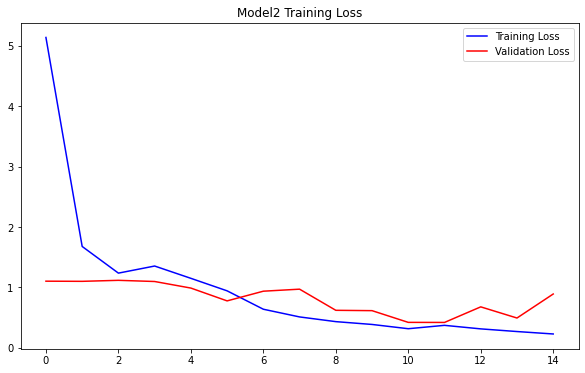

In [ ]:
# Model 2 Training Loss

plt.figure(figsize=(10,6))
plt.title("Model2 Training Loss")
plt.plot(model_config2_training_info["loss"], color='b', label="Training Loss")
plt.plot(model_config2_training_info["val_loss"], color='r', label="Validation Loss")
plt.legend()

Text(0, 0.5, 'Loss')

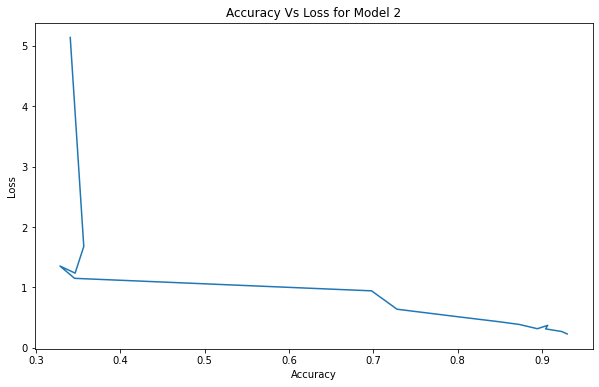

In [ ]:
# Loss Vs Accuracy

x_ticks = np.linspace(np.min(model_config2_training_info.loss) - 0.001,
                      np.max(model_config2_training_info.loss) + 0.001,
                      num=n_epochs)

y_ticks = np.linspace(np.min(model_config2_training_info.accuracy) - 0.001,
                      np.max(model_config2_training_info.accuracy) + 0.001,
                      num=n_epochs)

plt.figure(figsize=(10, 6))
plt.plot(model_config2_training_info.accuracy, model_config2_training_info.loss)
plt.x_ticks = x_ticks
plt.y_ticks = y_ticks
plt.title('Accuracy Vs Loss for Model 2')
plt.xlabel('Accuracy')
plt.ylabel('Loss')

## Model 3 Training

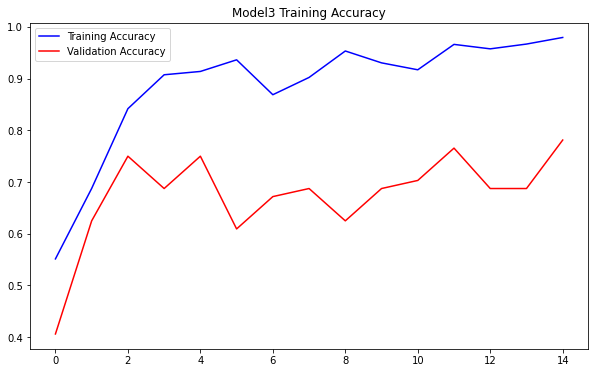

In [ ]:
# Model 3 Training Accuracy

plt.figure(figsize=(10,6))
plt.title("Model3 Training Accuracy")
plt.plot(model_config3_training_info["accuracy"], color='b', label="Training Accuracy")
plt.plot(model_config3_training_info["val_accuracy"], color='r', label="Validation Accuracy")
plt.legend()

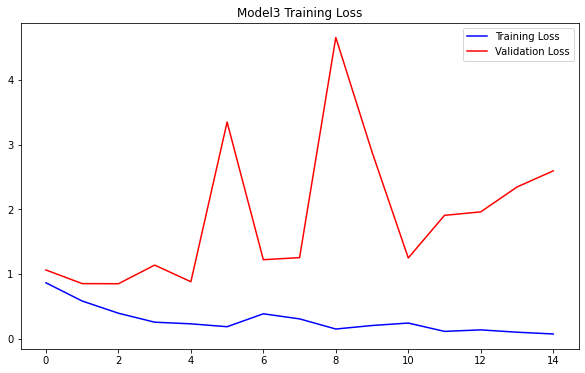

In [ ]:
# Model 3 Training Loss

plt.figure(figsize=(10,6))
plt.title("Model3 Training Loss")
plt.plot(model_config3_training_info["loss"], color='b', label="Training Loss")
plt.plot(model_config3_training_info["val_loss"], color='r', label="Validation Loss")
plt.legend()

Text(0, 0.5, 'Loss')

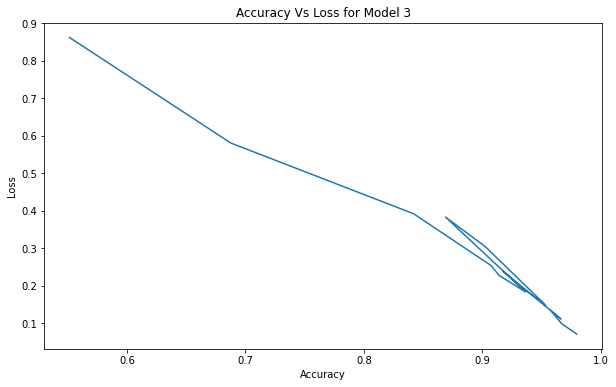

In [ ]:
# Loss Vs Accuracy

x_ticks = np.linspace(np.min(model_config3_training_info.loss) - 0.001,
                      np.max(model_config3_training_info.loss) + 0.001,
                      num=n_epochs)

y_ticks = np.linspace(np.min(model_config3_training_info.accuracy) - 0.001,
                      np.max(model_config3_training_info.accuracy) + 0.001,
                      num=n_epochs)

plt.figure(figsize=(10, 6))
plt.plot(model_config3_training_info.accuracy, model_config3_training_info.loss)
plt.x_ticks = x_ticks
plt.y_ticks = y_ticks
plt.title('Accuracy Vs Loss for Model 3')
plt.xlabel('Accuracy')
plt.ylabel('Loss')

## Model 4 Training

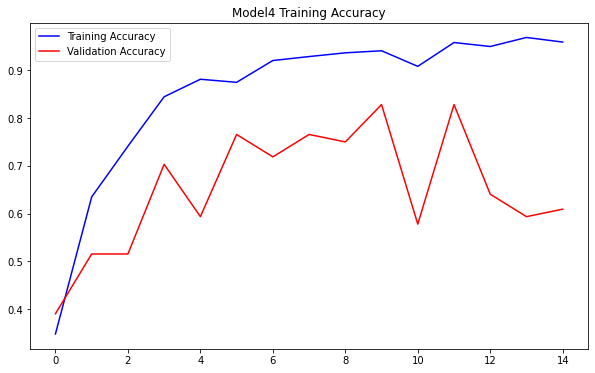

In [ ]:
# Model 4 Training Accuracy

plt.figure(figsize=(10,6))
plt.title("Model4 Training Accuracy")
plt.plot(model_config4_training_info["accuracy"], color='b', label="Training Accuracy")
plt.plot(model_config4_training_info["val_accuracy"], color='r', label="Validation Accuracy")
plt.legend()

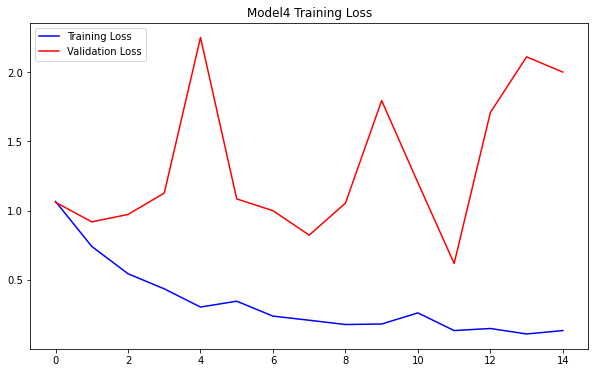

In [ ]:
# Model 4 Training Loss

plt.figure(figsize=(10,6))
plt.title("Model4 Training Loss")
plt.plot(model_config4_training_info["loss"], color='b', label="Training Loss")
plt.plot(model_config4_training_info["val_loss"], color='r', label="Validation Loss")
plt.legend()

Text(0, 0.5, 'Loss')

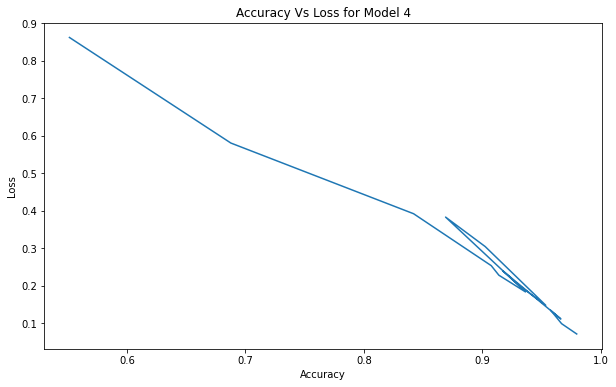

In [ ]:
# Loss Vs Accuracy

x_ticks = np.linspace(np.min(model_config4_training_info.loss) - 0.001,
                      np.max(model_config4_training_info.loss) + 0.001,
                      num=n_epochs)

y_ticks = np.linspace(np.min(model_config4_training_info.accuracy) - 0.001,
                      np.max(model_config4_training_info.accuracy) + 0.001,
                      num=n_epochs)

plt.figure(figsize=(10, 6))
plt.plot(model_config3_training_info.accuracy, model_config3_training_info.loss)
plt.x_ticks = x_ticks
plt.y_ticks = y_ticks
plt.title('Accuracy Vs Loss for Model 4')
plt.xlabel('Accuracy')
plt.ylabel('Loss')

# Loading Saved Models from Disk

In [ ]:
model1 = load_model(model_path + '/model1_glaucoma_config1_adam_256.h5')
model2 = load_model(model_path + '/model2_glaucoma_config2_RMSprop_256.h5')

model3 = load_model(model_path + '/model3_glaucoma_config3_Adam_128.h5')
model4 = load_model(model_path + '/model4_glaucoma_config4_Adam_64.h5')


# Models Predictions and Evaluations

## Some Utility Functions

In [ ]:
def load_image(img_path, target_size=(256,256), show=False):
  img = image.load_img(img_path, target_size=target_size, color_mode='rgb')

  #(height,width,channels)
  img_tensor = image.img_to_array(img)

  #img_tensor = np.vstack([img_tensor])

  #(1,height,width,channels), adds a dim coz model expects shape: (batch_size,height,width,channels)
  img_tensor = np.expand_dims(img_tensor,axis=0)

  #imshow expects values in range[0,1]
  img_tensor = img_tensor / 255.

  if show:
    plt.imshow(img_tensor[0])
    plt.axis('off')
    plt.show()

  return img_tensor


def get_class_value(x):
  if type(x) == list:
    classes = []
    for label in x:
      label_name = list(training_set_aug_images_conf4.class_indices.keys())[label]
      classes.append(label_name)

    return classes

  else:
      return list(training_set_aug_images_conf4.class_indices.keys())[x]


def get_labels(paths):
  labels = []
  for path in paths:
    label_class = path.split("/")[-2]
    label_num = training_set_aug_images.class_indices[label_class]
    labels.append(label_num)

  return labels


In [ ]:
def predict(model, data, target_size=(256,256), kind='augumented', limit=0, show=False):
  """
  Predicts the class(es) of image(s) in 'data' using 'model' and returns a dictionary object.
  Arguments:
  ----------
  model (cnn model): model predict with
  data (str or augmented_image_obj): A file path or an augmented image object:
  kind (str):  Specifies the type of 'data' passed.
  limit(int): The number of images to predict from given list of paths (< size of data)
  show (bool): Determines whether the Images should be shown (will always show if kind='single')
    Value:
      * Can be any of {'augumented' / 'single' / 'multiple'}, defaults to 'augumented'.
      * Set to 'single' if data is an image path,
      * set to 'multiple' if data is a list of images paths

  """

  # Initialize predictions
  predictions = {'pred_labels':[],  'true_labels':[], 'pred_values':[],'true_values':[]}

  if kind == 'augumented':
    predictions = predict_from_aug_obj(model, data, target_size, limit, show=show)
  elif kind == 'single':
    predictions = predict_single(model, data, target_size)
  elif kind == 'multiple':
    predictions = predict_multiple(model, data, target_size, limit, show=show)

  return predictions


def predict_from_aug_obj(model, aug_img_set_obj, target_size=(256,256), limit=0, show=False):
  # result template
  #result = {'pred_labels':[], 'True_labels':true_lbls, 'pred_values':pred_vals, 'True_values':true_vals}
  pred_lbls = []
  pred_vals = []
  true_lbls = []
  true_vals = []

  if limit <= 0 or limit > len(aug_img_set_obj.filepaths):
    file_paths = aug_img_set_obj.filepaths
  else:
    file_paths = aug_img_set_obj.filepaths[:limit]

  if show:
    rows = len(file_paths) // 4
    if len(file_paths) % 4 != 0:
      rows += 1

    plt.figure(num=len(file_paths), figsize=(20, 4 * rows))

  for i,img_path in enumerate(file_paths):
    # Converting the Image to array and predict
    new_image = load_image(img_path, target_size=target_size)
    predicted = model.predict_classes(new_image)

    # Showing Prediction details
    classes = [key for key in aug_img_set_obj.class_indices]
    predicted_value = classes[predicted[0]]
    actual_value = classes[aug_img_set_obj.labels[i]]

    if show:
      img_data = plt.imread(img_path)
      plt.subplot(rows, 4, i+1)
      #ax[row, col].imshow(img_data)
      plt.imshow(img_data)
      #plt.title("Pred. :{} True :{}".format(predicted[0], aug_img_set_obj.labels[i]))
      plt.axis('off')
      plt.title("Predicted : {} ({}) \nActual : {} ({})".format(predicted[0],
                                                                predicted_value,
                                                                aug_img_set_obj.labels[i],
                                                                actual_value))

    # Add predicted label to predictions
    pred_lbls.append(predicted[0])
    pred_vals.append(predicted_value)
    true_lbls.append(aug_img_set_obj.labels[i])
    true_vals.append(actual_value)

  return {'pred_labels':pred_lbls, 'true_labels':true_lbls, 'pred_values':pred_vals, 'true_values':true_vals}


def predict_multiple(model, img_paths, target_size=(256,256), limit=0, show=False):
  pred_lbls = []
  pred_vals = []

  if limit <= 0 or limit > len(img_paths):
    file_paths = img_paths
  else:
    file_paths = img_paths[:limit]

  if show:
    rows = len(file_paths) // 4
    if len(file_paths) % 4 != 0:
      rows += 1
    # Initialize plot to 20 width and (4 x rows) height (4 for each pix)
    plt.figure(num=len(file_paths), figsize=(20, 4 * rows))

  for i, path in enumerate(file_paths):
    new_image = load_image(path, target_size)
    predicted = model.predict_classes(new_image)
    pred_lbls.append(predicted[0])
    pred_vals.append(get_class_value(predicted[0]))

    if show:
      # Show Image
      img_data = plt.imread(path)
      plt.subplot(rows, 4, i+1)
      plt.imshow(img_data)
      #plt.title("Pred. :{} True :{}".format(predicted[0], aug_img_set_obj.labels[i]))
      plt.axis('off')
      plt.title(f'Predicted: {predicted[0]} ({get_class_value(predicted[0])})')

  return {'pred_labels':pred_lbls, 'true_labels':[], 'pred_values':pred_vals, 'true_values':[]}


def predict_single(model, img_path, target_size=(256,256)):
  new_image = load_image(img_path, target_size)
  predicted = model.predict_classes(new_image)
  class_val = get_class_value(predicted[0])

  # Show Image
  img_data = plt.imread(img_path)
  plt.imshow(img_data)
  plt.title(f'Pred.: {predicted[0]} ({class_val})')
  plt.axis('off')

  return {'pred_labels':[predicted[0]], 'true_labels':[], 'pred_values':[class_val], 'true_values':[]}

def predict_multiple_v2(model, data, target_size=(256,256), limit=0):
  pred_labels = []
  pred_values = []

  if limit <= 0 or limit > len(data):
    file_paths = data
  else:
    file_paths = data[:limit]

  for path in file_paths:
    result = predict_single(model, path, target_size)
    pred_labels.append(result["pred_labels"][0])
    pred_values.append([result["pred_values"][0]])

  return {'pred_labels':pred_labels, 'true_labels':[], 'pred_values':pred_values, 'true_values':[]}


# Evaluating the Trained Models Prediction with the Test Set

## Testset Data for Model 1 and Model 2

In [ ]:
# Loading Testing Set data for Model 1 and Model 2

print(f'\nClass Indices: \n{testing_set_aug_images.class_indices}\n')
print(f'True Labels: \n{testing_set_aug_images.labels}')

True_labels = testing_set_aug_images.labels
#test_set_paths = testing_set_aug_images.filenames
#test_set_paths = testing_set_aug_images.filepaths


Class Indices: 
{'closed_angle_glaucoma': 0, 'normal': 1, 'open_angle_glaucoma': 2}

True Labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [ ]:
scores1 = model1.evaluate_generator(generator=testing_set_aug_images, steps=int(0.75 * len(testing_set_aug_images.labels) / BATCH_SIZE), verbose=2)
scores2 = model2.evaluate_generator(generator=testing_set_aug_images, steps=int(0.75 * len(testing_set_aug_images.labels) / BATCH_SIZE), verbose=2)

scores3 = model3.evaluate_generator(generator=testing_set_aug_images_conf3, steps=int(0.75 * len(testing_set_aug_images_conf3.labels) / BATCH_SIZE), verbose=2)
scores4 = model4.evaluate_generator(generator=testing_set_aug_images_conf4, steps=int(0.75 * len(testing_set_aug_images_conf4.labels) / BATCH_SIZE), verbose=2)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


7/7 - 17s - loss: 1.5083 - accuracy: 0.7723
7/7 - 17s - loss: 0.8532 - accuracy: 0.8304
7/7 - 17s - loss: 1.2731 - accuracy: 0.8616
7/7 - 17s - loss: 0.8291 - accuracy: 0.8438


In [ ]:
# Displaying Evaluation Result
print("SCORES OF EVALUATING TEST SET ON EACH OF THE MODELS")
print('-------------------------------------------------\n')
print(f"Evaluation of model 1 with Config 1: \t\t (loss = {np.round(scores1[0], 5)} \t\t accuracy = {np.round(scores1[1] * 100, 1)}%)")
print(f"Evaluation of model 2 with Config 2: \t\t (loss = {np.round(scores2[0], 5)} \t\t accuracy = {np.round(scores2[1] * 100, 1)}%)")
print(f"Evaluation of model 3 with Config 3: \t\t (loss = {np.round(scores3[0], 5)} \t\t accuracy = {np.round(scores3[1] * 100, 1)}%)")
print(f"Evaluation of model 4 with Config 4: \t\t (loss = {np.round(scores4[0], 5)} \t\t accuracy = {np.round(scores4[1] * 100, 1)}%)")

SCORES OF EVALUATING TEST SET ON EACH OF THE MODELS
-------------------------------------------------

Evaluation of model 1 with Config 1: 		 (loss = 1.50826 		 accuracy = 77.2%)
Evaluation of model 2 with Config 2: 		 (loss = 0.85317 		 accuracy = 83.0%)
Evaluation of model 3 with Config 3: 		 (loss = 1.2731 		 accuracy = 86.2%)
Evaluation of model 4 with Config 4: 		 (loss = 0.82914 		 accuracy = 84.4%)


# Predictions Made from the Test Set

In [ ]:
pred_test_model1 = predict(model=model1, data=testing_set_aug_images, target_size=(256,256), kind='augumented', limit=0, show=False)
pred_test_model2 = predict(model=model2, data=testing_set_aug_images, target_size=(256,256), kind='augumented', limit=0, show=False)

pred_test_model3 = predict(model=model3, data=testing_set_aug_images_conf3, target_size=(128,128), kind='augumented', limit=0, show=False)
pred_test_model4 = predict(model=model4, data=testing_set_aug_images_conf4, target_size=(64,64), kind='augumented', limit=0, show=False)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## True Labels

In [ ]:
# True Labels

y_true_test = testing_set_aug_images.labels.tolist()
y_true_test3 = testing_set_aug_images_conf3.labels.tolist()
y_true_test4 = testing_set_aug_images_conf4.labels.tolist()

## Model 1 Predictions

In [ ]:
# Top 15 Predictions made by Model 1

y_pred_test_model1 = pd.DataFrame(pred_test_model1)
y_pred_test_model1.head(15)

pred_labels  true_labels            pred_values            true_values
0             0            0  closed_angle_glaucoma  closed_angle_glaucoma
1             0            0  closed_angle_glaucoma  closed_angle_glaucoma
2             0            0  closed_angle_glaucoma  closed_angle_glaucoma
3             0            0  closed_angle_glaucoma  closed_angle_glaucoma
4             0            0  closed_angle_glaucoma  closed_angle_glaucoma
5             0            0  closed_angle_glaucoma  closed_angle_glaucoma
6             0            0  closed_angle_glaucoma  closed_angle_glaucoma
7             0            0  closed_angle_glaucoma  closed_angle_glaucoma
8             0            0  closed_angle_glaucoma  closed_angle_glaucoma
9             0            0  closed_angle_glaucoma  closed_angle_glaucoma
10            0            0  closed_angle_glaucoma  closed_angle_glaucoma
11            0            0  closed_angle_glaucoma  closed_angle_glaucoma
12            0            0  closed_angle_glaucoma  closed_angle_glaucoma
13            0            0  closed_angle_glaucoma  closed_angle_glaucoma
14            0            0  closed_angle_glaucoma  closed_angle_glaucoma

## Model 2 Predictions

In [ ]:
# Top 15 Predictions made by Model 2

y_pred_test_model2 = pd.DataFrame(pred_test_model2)
y_pred_test_model2.head(15)

pred_labels  true_labels            pred_values            true_values
0             0            0  closed_angle_glaucoma  closed_angle_glaucoma
1             0            0  closed_angle_glaucoma  closed_angle_glaucoma
2             0            0  closed_angle_glaucoma  closed_angle_glaucoma
3             0            0  closed_angle_glaucoma  closed_angle_glaucoma
4             0            0  closed_angle_glaucoma  closed_angle_glaucoma
5             0            0  closed_angle_glaucoma  closed_angle_glaucoma
6             0            0  closed_angle_glaucoma  closed_angle_glaucoma
7             0            0  closed_angle_glaucoma  closed_angle_glaucoma
8             0            0  closed_angle_glaucoma  closed_angle_glaucoma
9             0            0  closed_angle_glaucoma  closed_angle_glaucoma
10            0            0  closed_angle_glaucoma  closed_angle_glaucoma
11            0            0  closed_angle_glaucoma  closed_angle_glaucoma
12            0            0  closed_angle_glaucoma  closed_angle_glaucoma
13            0            0  closed_angle_glaucoma  closed_angle_glaucoma
14            0            0  closed_angle_glaucoma  closed_angle_glaucoma

## Model 3 Predictions

In [ ]:
# Top 15 Predictions made by Model 3

y_pred_test_model3 = pd.DataFrame(pred_test_model3)
y_pred_test_model3.head(15)

pred_labels  true_labels            pred_values            true_values
0             0            0  closed_angle_glaucoma  closed_angle_glaucoma
1             0            0  closed_angle_glaucoma  closed_angle_glaucoma
2             0            0  closed_angle_glaucoma  closed_angle_glaucoma
3             0            0  closed_angle_glaucoma  closed_angle_glaucoma
4             0            0  closed_angle_glaucoma  closed_angle_glaucoma
5             0            0  closed_angle_glaucoma  closed_angle_glaucoma
6             0            0  closed_angle_glaucoma  closed_angle_glaucoma
7             0            0  closed_angle_glaucoma  closed_angle_glaucoma
8             0            0  closed_angle_glaucoma  closed_angle_glaucoma
9             0            0  closed_angle_glaucoma  closed_angle_glaucoma
10            0            0  closed_angle_glaucoma  closed_angle_glaucoma
11            0            0  closed_angle_glaucoma  closed_angle_glaucoma
12            0            0  closed_angle_glaucoma  closed_angle_glaucoma
13            0            0  closed_angle_glaucoma  closed_angle_glaucoma
14            0            0  closed_angle_glaucoma  closed_angle_glaucoma

## Model 4 Predictions

In [ ]:
# Top 15 Predictions made by Model 4

y_pred_test_model4 = pd.DataFrame(pred_test_model4)
y_pred_test_model4.head(15)

pred_labels  true_labels            pred_values            true_values
0             0            0  closed_angle_glaucoma  closed_angle_glaucoma
1             0            0  closed_angle_glaucoma  closed_angle_glaucoma
2             0            0  closed_angle_glaucoma  closed_angle_glaucoma
3             0            0  closed_angle_glaucoma  closed_angle_glaucoma
4             0            0  closed_angle_glaucoma  closed_angle_glaucoma
5             0            0  closed_angle_glaucoma  closed_angle_glaucoma
6             0            0  closed_angle_glaucoma  closed_angle_glaucoma
7             0            0  closed_angle_glaucoma  closed_angle_glaucoma
8             0            0  closed_angle_glaucoma  closed_angle_glaucoma
9             0            0  closed_angle_glaucoma  closed_angle_glaucoma
10            0            0  closed_angle_glaucoma  closed_angle_glaucoma
11            0            0  closed_angle_glaucoma  closed_angle_glaucoma
12            0            0  closed_angle_glaucoma  closed_angle_glaucoma
13            0            0  closed_angle_glaucoma  closed_angle_glaucoma
14            0            0  closed_angle_glaucoma  closed_angle_glaucoma

# Performance Evaluation of Each Model Performances

## Model 1 Performances

In [ ]:
# Classification Report

print("\n")
print("\t\tClassification Report for Model 1")
print("\t\t----------------------------------\n")

print(classification_report(y_true_test, y_pred_test_model1.pred_labels))




		Classification Report for Model 1
		----------------------------------

              precision    recall  f1-score   support

           0       0.58      1.00      0.74       100
           1       1.00      0.67      0.80       100
           2       1.00      0.62      0.77       100

    accuracy                           0.76       300
   macro avg       0.86      0.76      0.77       300
weighted avg       0.86      0.76      0.77       300



Text(33.0, 0.5, 'True Label')

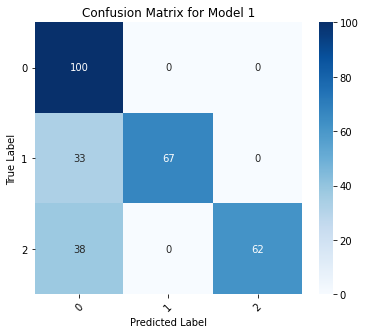

In [ ]:
# Confusion Matrix

conf_mat = confusion_matrix(y_true_test, y_pred_test_model1.pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 1")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [ ]:
print("Evaluation Metrics (Model 1)")
print('----------------------------\n')
print('Accuracy: \t', np.round(accuracy_score(y_true_test, y_pred_test_model1.pred_labels), 3))
print('Recall: \t', np.round(recall_score(y_true_test, y_pred_test_model1.pred_labels, average="weighted"), 3))
print('Precision: \t', np.round(precision_score(y_true_test, y_pred_test_model1.pred_labels, average="weighted"), 3))
print('F1-Score: \t', np.round(f1_score(y_true_test, y_pred_test_model1.pred_labels, average="weighted"), 3))
#print('ROC_AUC: \t', roc_auc_score(y_true_test, y_pred_test_model1.pred_labels, multi_class='ovo'))


Evaluation Metrics (Model 1)
----------------------------

Accuracy: 	 0.763
Recall: 	 0.763
Precision: 	 0.862
F1-Score: 	 0.769


## Model 2 Performances

In [ ]:
# Classification Report

print("\n")
print("\t\tClassification Report for Model 2")
print("\t\t----------------------------------\n")

print(classification_report(y_true_test, y_pred_test_model2.pred_labels))




		Classification Report for Model 2
		----------------------------------

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       100
           1       1.00      0.89      0.94       100
           2       1.00      0.63      0.77       100

    accuracy                           0.84       300
   macro avg       0.89      0.84      0.84       300
weighted avg       0.89      0.84      0.84       300



Text(33.0, 0.5, 'True Label')

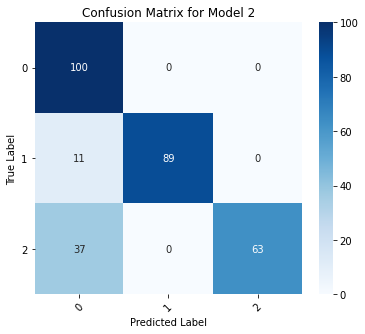

In [ ]:
# Confusion Matrix

conf_mat = confusion_matrix(y_true_test, y_pred_test_model2.pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 2")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [ ]:
print("Evaluation Metrics (Model 2)")
print('----------------------------\n')
print('Accuracy: \t', np.round(accuracy_score(y_true_test, y_pred_test_model2.pred_labels), 3))
print('Recall: \t', np.round(recall_score(y_true_test, y_pred_test_model2.pred_labels, average="weighted"), 3))
print('Precision: \t', np.round(precision_score(y_true_test, y_pred_test_model2.pred_labels, average="weighted"), 3))
print('F1-Score: \t', np.round(f1_score(y_true_test, y_pred_test_model2.pred_labels, average="weighted"), 3))
#print('ROC_AUC: \t', roc_auc_score(y_true_test, y_pred_test_model2.pred_labels, multi_class='ovo'))


Evaluation Metrics (Model 2)
----------------------------

Accuracy: 	 0.84
Recall: 	 0.84
Precision: 	 0.892
F1-Score: 	 0.84


## Model 3 Performances

In [ ]:
# Classification Report

print("\n")
print("\t\tClassification Report for Model 3")
print("\t\t----------------------------------\n")

print(classification_report(y_true_test3, y_pred_test_model3.pred_labels))




		Classification Report for Model 3
		----------------------------------

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       100
           1       1.00      0.78      0.88       100
           2       1.00      0.79      0.88       100

    accuracy                           0.86       300
   macro avg       0.90      0.86      0.86       300
weighted avg       0.90      0.86      0.86       300



Text(33.0, 0.5, 'True Label')

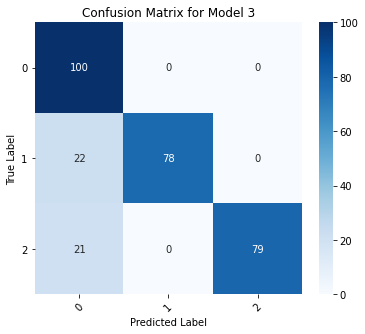

In [ ]:
# Confusion Matrix

conf_mat = confusion_matrix(y_true_test3, y_pred_test_model3.pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 3")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [ ]:
print("Evaluation Metrics (Model 3)")
print('----------------------------\n')
print('Accuracy: \t', np.round(accuracy_score(y_true_test3, y_pred_test_model3.pred_labels), 3))
print('Recall: \t', np.round(recall_score(y_true_test3, y_pred_test_model3.pred_labels, average="weighted"), 3))
print('Precision: \t', np.round(precision_score(y_true_test3, y_pred_test_model3.pred_labels, average="weighted"), 3))
print('F1-Score: \t', np.round(f1_score(y_true_test3, y_pred_test_model3.pred_labels, average="weighted"), 3))
#print('ROC_AUC: \t', roc_auc_score(y_true_test3, y_pred_test_model3.pred_labels, multi_class='ovo'))


Evaluation Metrics (Model 3)
----------------------------

Accuracy: 	 0.857
Recall: 	 0.857
Precision: 	 0.9
F1-Score: 	 0.861


## Model 4 Performances

In [ ]:
# Classification Report

print("\n")
print("\t\tClassification Report for Model 4")
print("\t\t----------------------------------\n")

print(classification_report(y_true_test4, y_pred_test_model4.pred_labels))




		Classification Report for Model 4
		----------------------------------

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       100
           1       0.85      0.89      0.87       100
           2       1.00      0.63      0.77       100

    accuracy                           0.84       300
   macro avg       0.87      0.84      0.83       300
weighted avg       0.87      0.84      0.83       300



Text(33.0, 0.5, 'True Label')

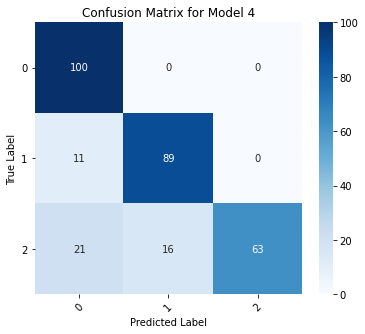

In [ ]:
# Confusion Matrix

conf_mat = confusion_matrix(y_true_test4, y_pred_test_model4.pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Model 4")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")


In [ ]:
print("Evaluation Metrics (Model 4)")
print('----------------------------\n')
print('Accuracy: \t', np.round(accuracy_score(y_true_test4, y_pred_test_model4.pred_labels), 3))
print('Recall: \t', np.round(recall_score(y_true_test4, y_pred_test_model4.pred_labels, average="weighted"), 3))
print('Precision: \t', np.round(precision_score(y_true_test4, y_pred_test_model4.pred_labels, average="weighted"), 3))
print('F1-Score: \t', np.round(f1_score(y_true_test4, y_pred_test_model4.pred_labels, average="weighted"), 3))
#print('ROC_AUC: \t', roc_auc_score(y_true_test4, y_pred_test_model4.pred_labels, multi_class='ovo'))


Evaluation Metrics (Model 4)
----------------------------

Accuracy: 	 0.84
Recall: 	 0.84
Precision: 	 0.868
F1-Score: 	 0.834


# Visualized Predictions

In [ ]:
img_path1 = origin_path + '/test_set/open_angle_glaucoma/'
img_path2 = origin_path + '/test_set/closed_angle_glaucoma/'
img_path3 = origin_path + '/test_set/normal/'

temp_images = [img_path1 + path for path in listdir(img_path1)]
temp_images.extend([img_path2 + path for path in listdir(img_path2)])
temp_images.extend([img_path3 + path for path in listdir(img_path3)])

print(f'Number of Eye Images to test: \t {len(temp_images)}')


Number of Eye Images to test: 	 300


In [ ]:
# Shuffles the test set and randomly samples 30 images from there (So all categories will be represented)

np.random.shuffle(temp_images)
temp_images = list(np.random.choice(temp_images, size=20))

print(f'Number of Eye Images to test: \t {len(temp_images)}')

Number of Eye Images to test: 	 20


## Model 1



					MODEL 1 PREDICTIONS
					*******************



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


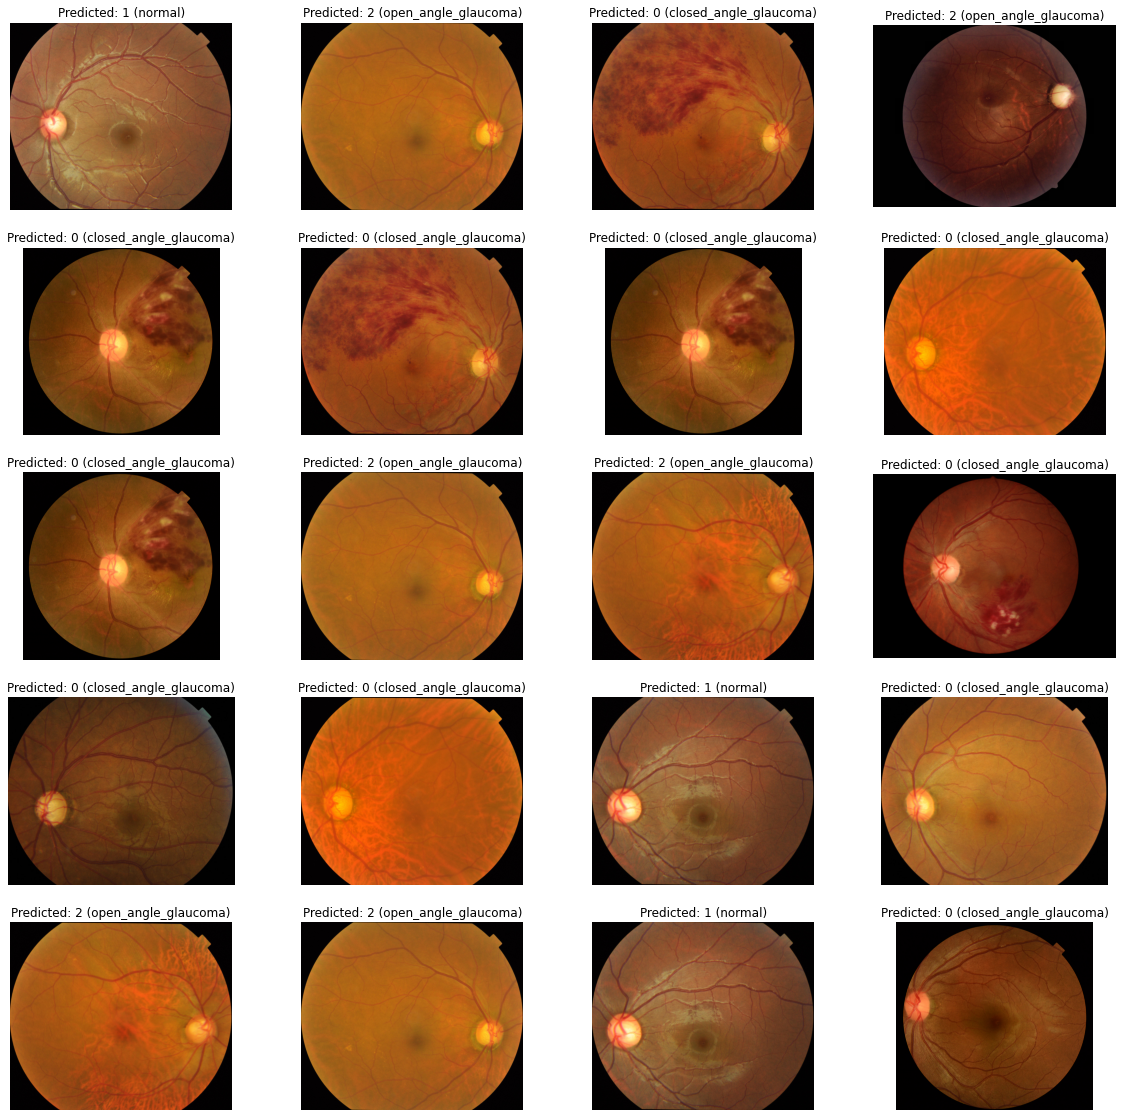

In [ ]:
print("\n")
print("\t\t\t\t\tMODEL 1 PREDICTIONS")
print("\t\t\t\t\t*******************\n")
pred = predict(model1, data=temp_images, target_size=(256,256), kind="multiple", limit=0, show=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



			********************************

				 RESULTs
				 -------

			 Accuracy: 	 100.0 %
			 Recall: 	 100.0 %
			 Precision: 	 100.0 %
			 F1-score: 	 100.0 %

			********************************





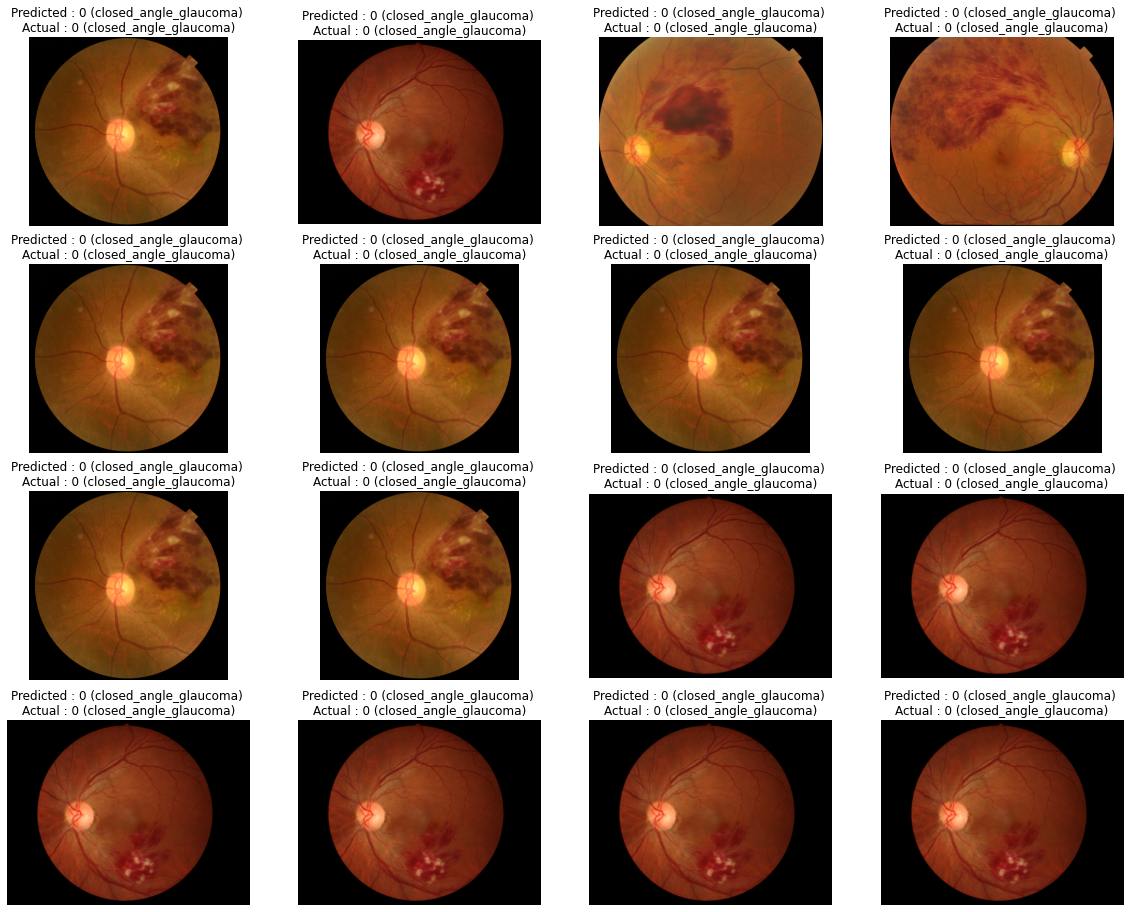

In [ ]:
pred = predict(model1, data=testing_set_aug_images, target_size=(256,256), kind="augumented", limit=16, show=True)
pred = pd.DataFrame(pred)

print("\n\t\t\t********************************\n")
print("\t\t\t\t RESULTs")
print("\t\t\t\t -------\n")
print(f"\t\t\t Accuracy: \t {np.round(accuracy_score(pred.true_labels, pred.pred_labels), 2) * 100} %")
print(f"\t\t\t Recall: \t {np.round(recall_score(pred.true_labels, pred.pred_labels, average='weighted'), 2) * 100} %")
print(f"\t\t\t Precision: \t {np.round(precision_score(pred.true_labels, pred.pred_labels, average='weighted'), 2) * 100} %")
print(f"\t\t\t F1-score: \t {np.round(f1_score(pred.true_labels, pred.pred_labels, average='weighted'), 2) * 100} %")
print("\n\t\t\t********************************")
print("\n\n")


## Model 2



					MODEL 2 PREDICTIONS
					*******************



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


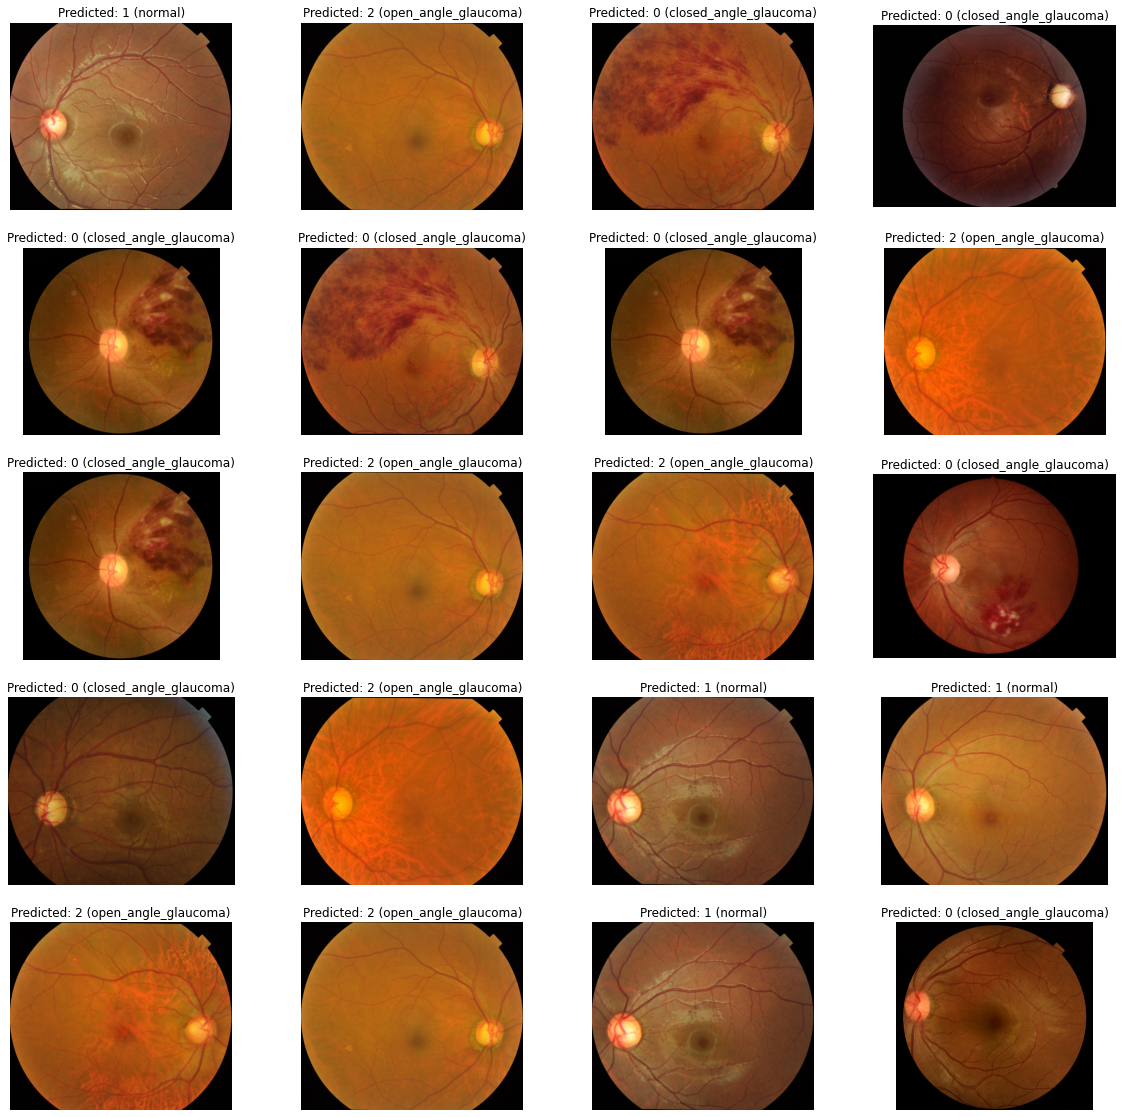

In [ ]:
print("\n")
print("\t\t\t\t\tMODEL 2 PREDICTIONS")
print("\t\t\t\t\t*******************\n")
pred = predict(model2, data=temp_images, target_size=(256,256), kind="multiple", limit=0, show=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



			********************************

				 RESULTs
				 -------

			 Accuracy: 	 100.0 %
			 Recall: 	 100.0 %
			 Precision: 	 100.0 %
			 F1-score: 	 100.0 %

			********************************





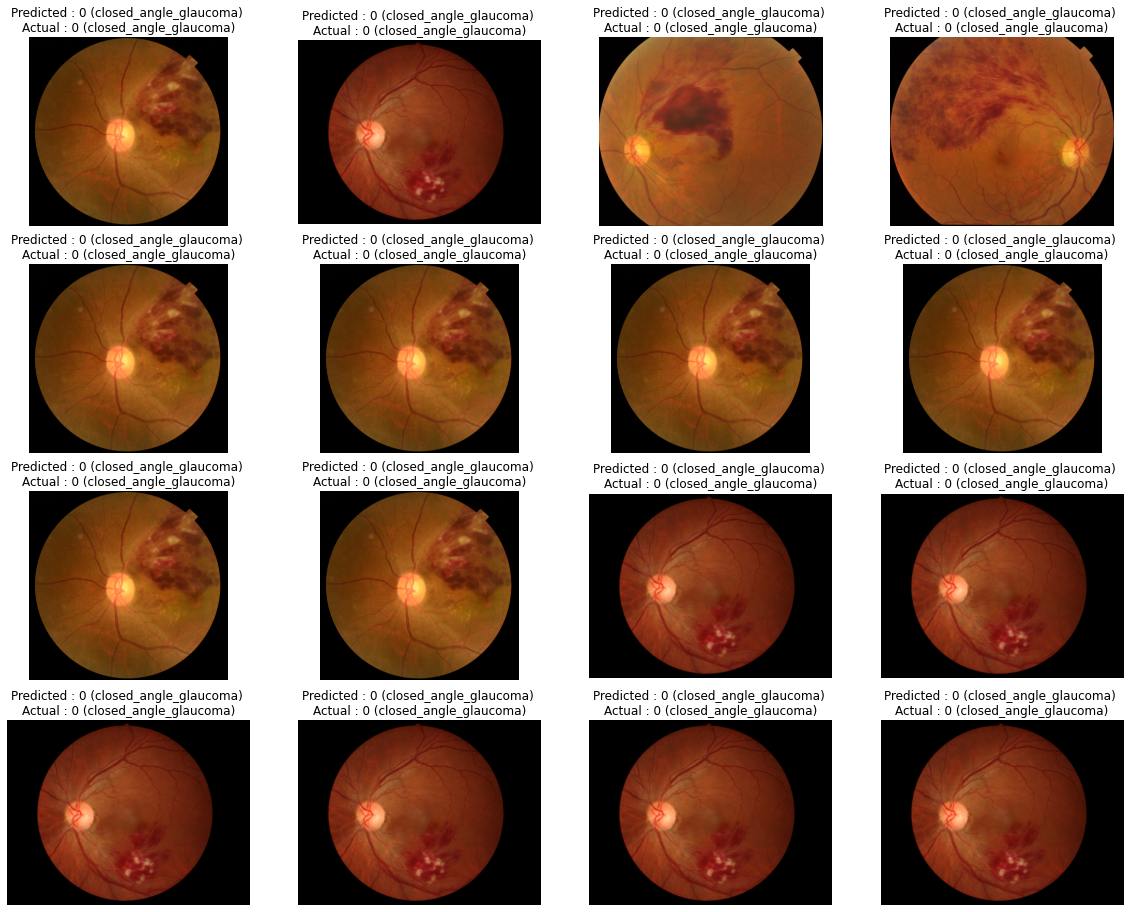

In [ ]:
pred = predict(model2, data=testing_set_aug_images, target_size=(256,256), kind="augumented", limit=16, show=True)
pred = pd.DataFrame(pred)

print("\n\t\t\t********************************\n")
print("\t\t\t\t RESULTs")
print("\t\t\t\t -------\n")
print(f"\t\t\t Accuracy: \t {np.round(accuracy_score(pred.true_labels, pred.pred_labels), 2) * 100} %")
print(f"\t\t\t Recall: \t {np.round(recall_score(pred.true_labels, pred.pred_labels, average='weighted'), 2) * 100} %")
print(f"\t\t\t Precision: \t {np.round(precision_score(pred.true_labels, pred.pred_labels, average='weighted'), 2) * 100} %")
print(f"\t\t\t F1-score: \t {np.round(f1_score(pred.true_labels, pred.pred_labels, average='weighted'), 2) * 100} %")
print("\n\t\t\t********************************")
print("\n\n")


## Model 3



					MODEL 3 PREDICTIONS
					*******************



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


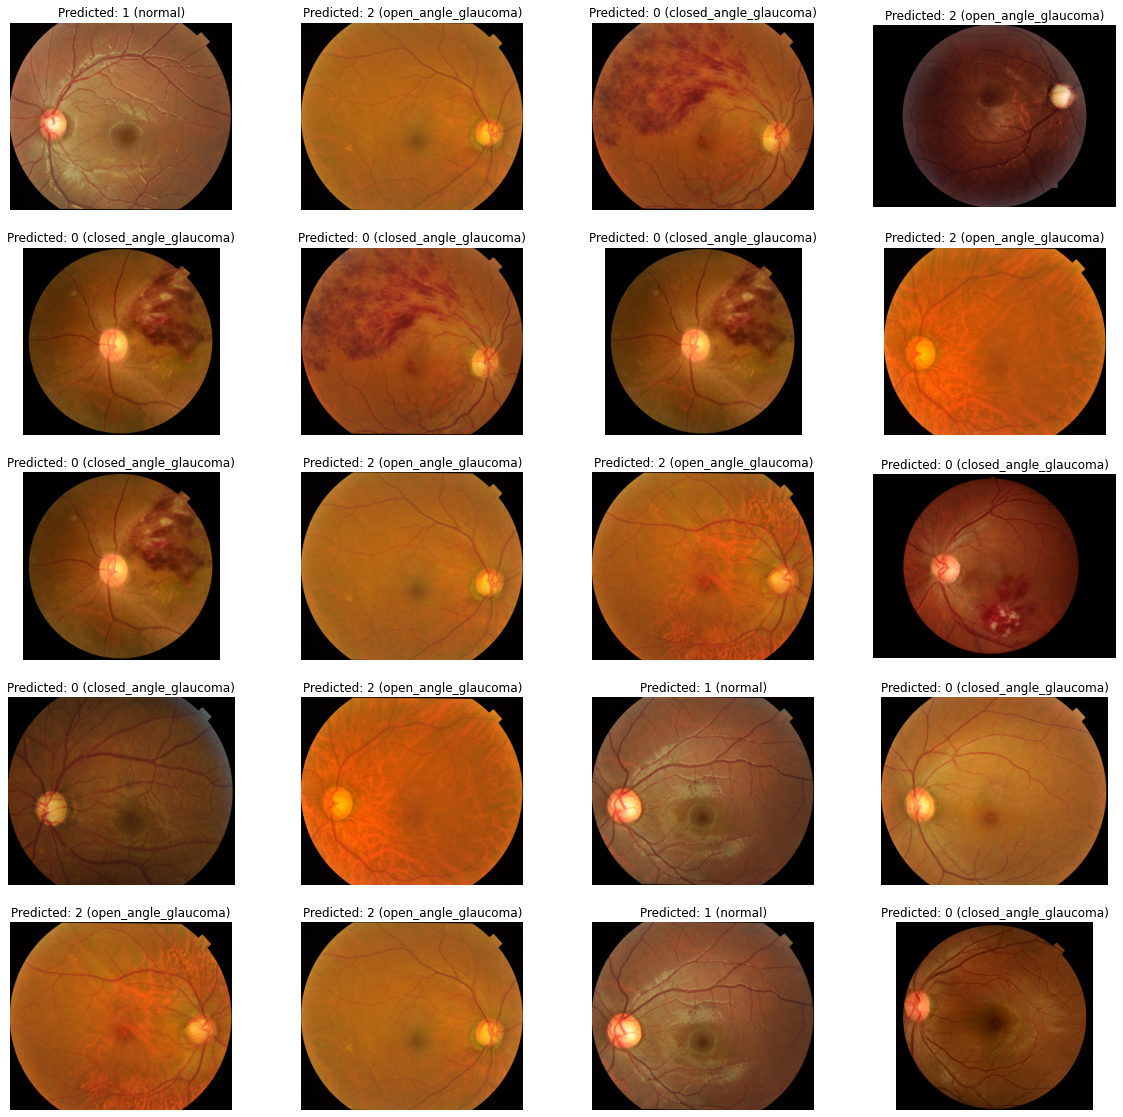

In [ ]:
print("\n")
print("\t\t\t\t\tMODEL 3 PREDICTIONS")
print("\t\t\t\t\t*******************\n")
pred = predict(model3, data=temp_images, target_size=(128,128), kind="multiple", limit=0, show=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



			********************************

				 RESULTs
				 -------

			 Accuracy: 	 100.0 %
			 Recall: 	 100.0 %
			 Precision: 	 100.0 %
			 F1-score: 	 100.0 %

			********************************





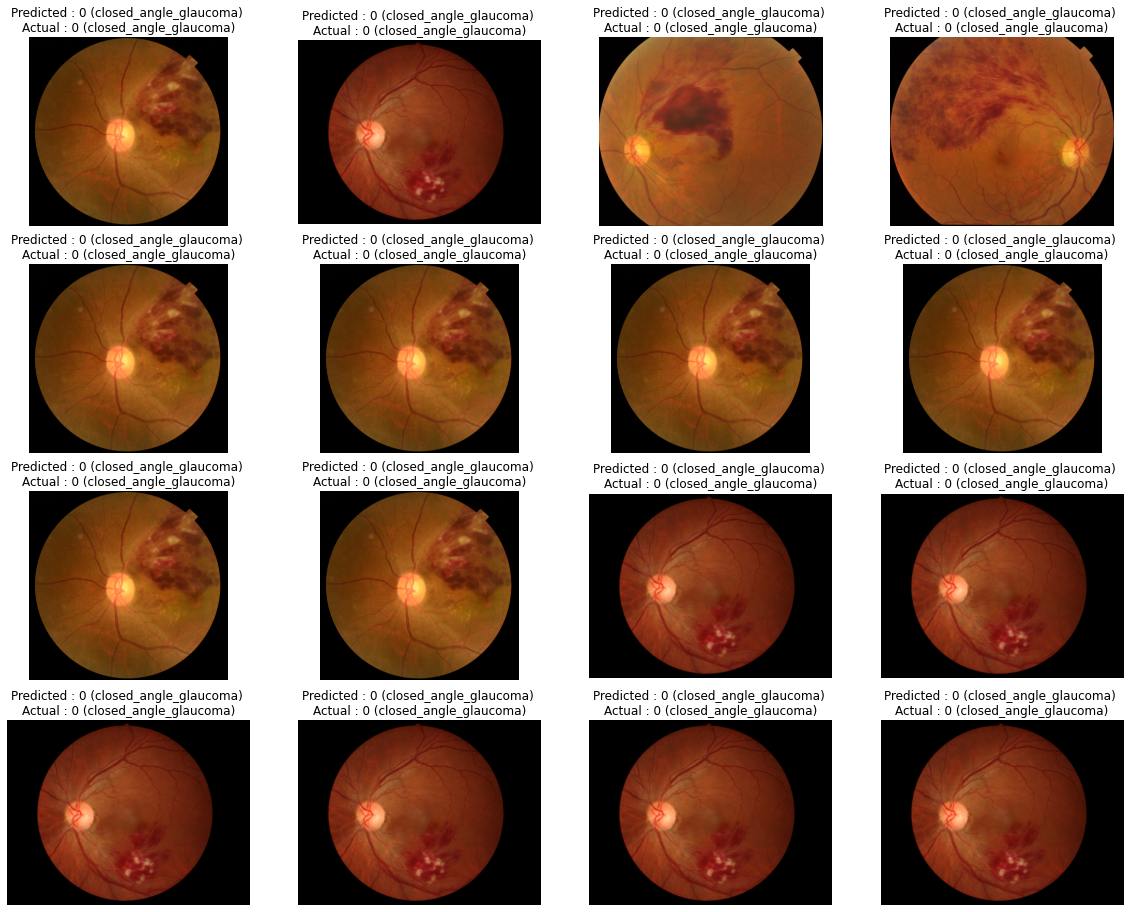

In [ ]:
pred = predict(model3, data=testing_set_aug_images_conf3, target_size=(128,128), kind="augumented", limit=16, show=True)
pred = pd.DataFrame(pred)

print("\n\t\t\t********************************\n")
print("\t\t\t\t RESULTs")
print("\t\t\t\t -------\n")
print(f"\t\t\t Accuracy: \t {np.round(accuracy_score(pred.true_labels, pred.pred_labels), 2) * 100} %")
print(f"\t\t\t Recall: \t {np.round(recall_score(pred.true_labels, pred.pred_labels, average='weighted'), 2) * 100} %")
print(f"\t\t\t Precision: \t {np.round(precision_score(pred.true_labels, pred.pred_labels, average='weighted'), 2) * 100} %")
print(f"\t\t\t F1-score: \t {np.round(f1_score(pred.true_labels, pred.pred_labels, average='weighted'), 2) * 100} %")
print("\n\t\t\t********************************")
print("\n\n")


## Model 4



					MODEL 4 PREDICTIONS
					*******************



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


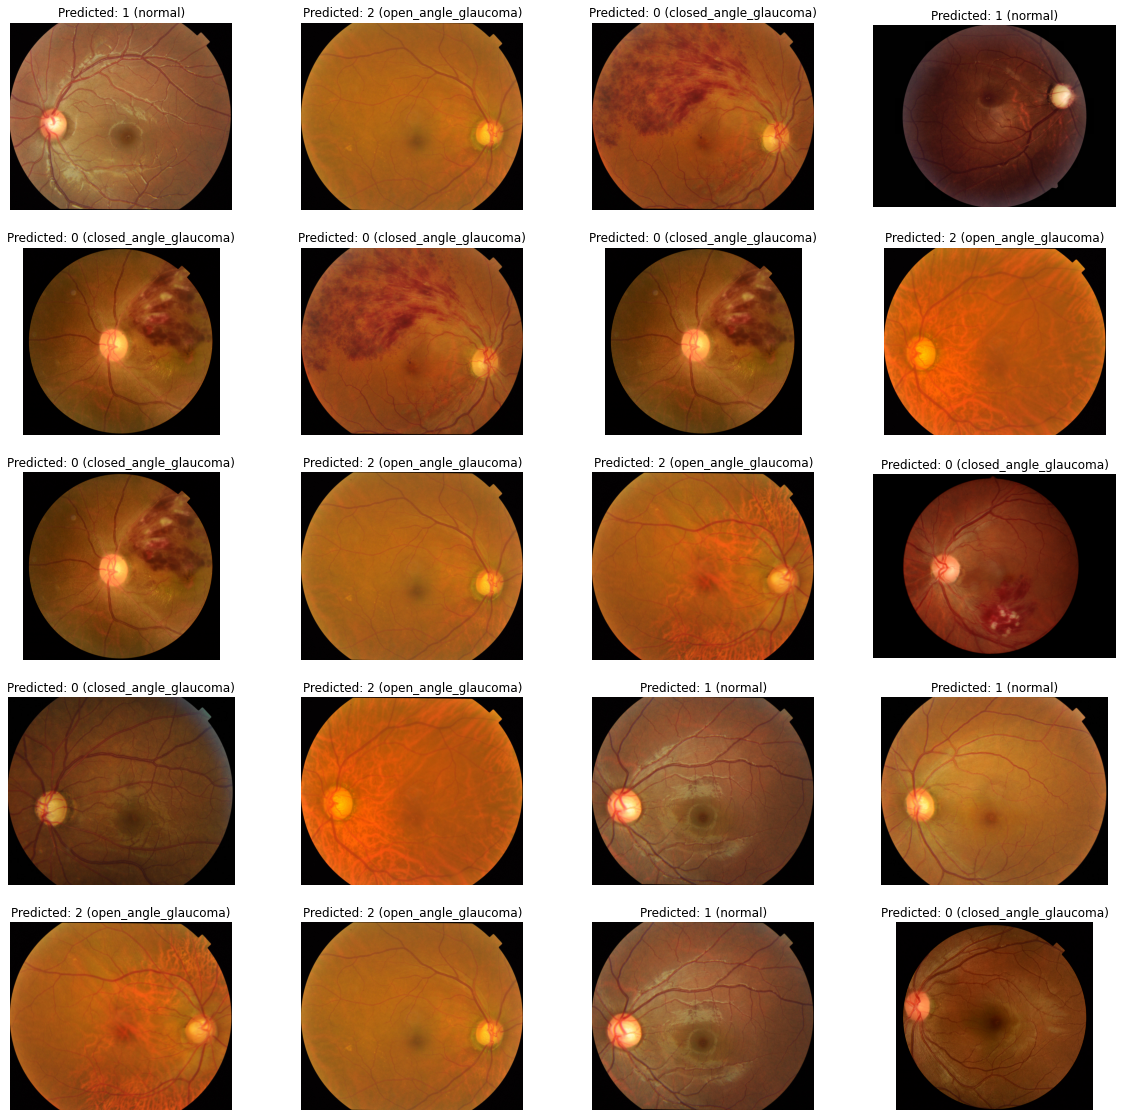

In [ ]:
print("\n")
print("\t\t\t\t\tMODEL 4 PREDICTIONS")
print("\t\t\t\t\t*******************\n")
pred = predict(model4, data=temp_images, target_size=(64,64), kind="multiple", limit=0, show=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



			********************************

				 RESULTs
				 -------

			 Accuracy: 	 100.0 %
			 Recall: 	 100.0 %
			 Precision: 	 100.0 %
			 F1-score: 	 100.0 %

			********************************





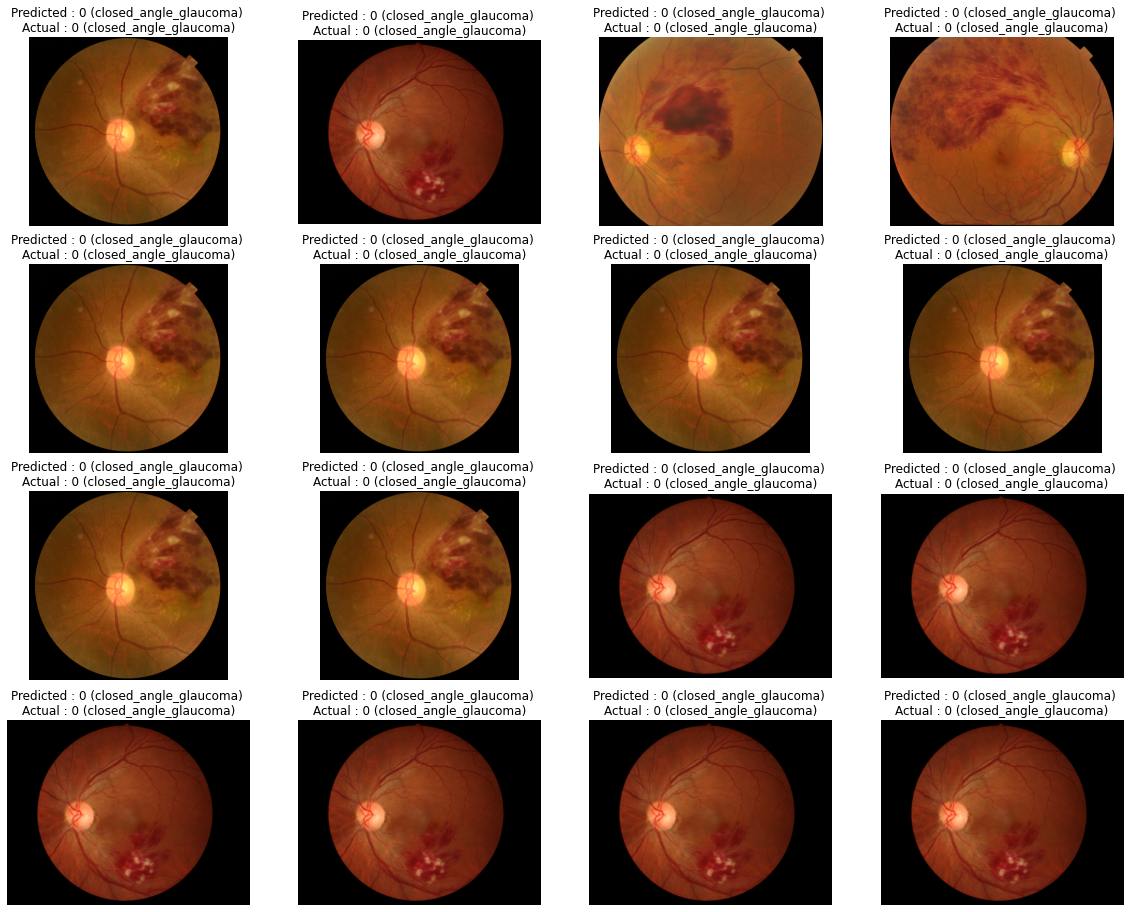

In [ ]:
pred = predict(model4, data=testing_set_aug_images_conf4, target_size=(64,64), kind="augumented", limit=16, show=True)
pred = pd.DataFrame(pred)

print("\n\t\t\t********************************\n")
print("\t\t\t\t RESULTs")
print("\t\t\t\t -------\n")
print(f"\t\t\t Accuracy: \t {np.round(accuracy_score(pred.true_labels, pred.pred_labels), 2) * 100} %")
print(f"\t\t\t Recall: \t {np.round(recall_score(pred.true_labels, pred.pred_labels, average='weighted'), 2) * 100} %")
print(f"\t\t\t Precision: \t {np.round(precision_score(pred.true_labels, pred.pred_labels, average='weighted'), 2) * 100} %")
print(f"\t\t\t F1-score: \t {np.round(f1_score(pred.true_labels, pred.pred_labels, average='weighted'), 2) * 100} %")
print("\n\t\t\t********************************")
print("\n\n")


# ================= THE END ====================